<a href="https://colab.research.google.com/github/yurigalindo/LayerReweightingToy/blob/main/3D_toy_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from toy_3d import experiment

{'LLR': tensor(0.9908), 'before': tensor(0.5855), 'random': tensor(1.)}

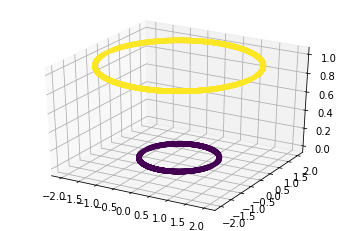

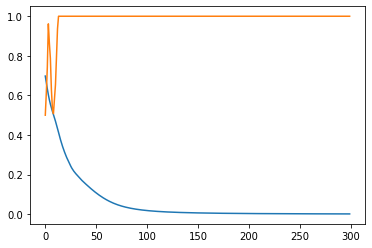

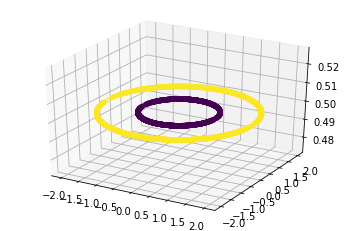

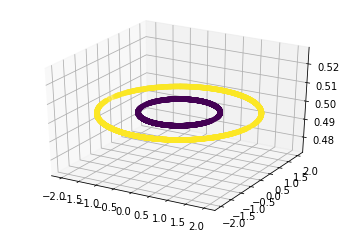

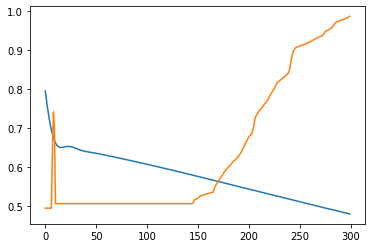

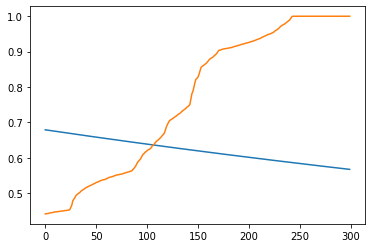

In [ ]:
experiment(512,16,300,verbose=True,exp="mid")

{'LLR': tensor(0.5048), 'before': tensor(0.4952), 'random': tensor(0.7940)}

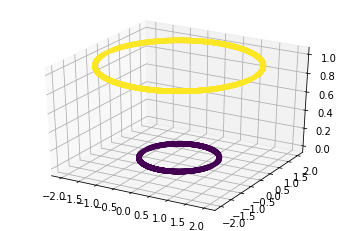

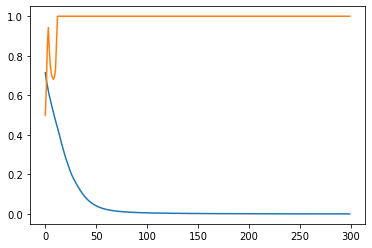

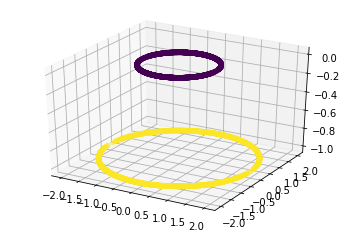

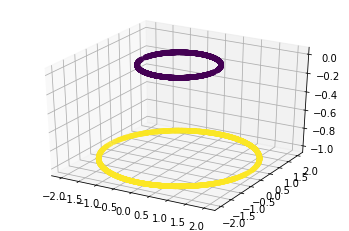

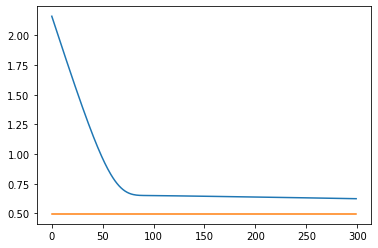

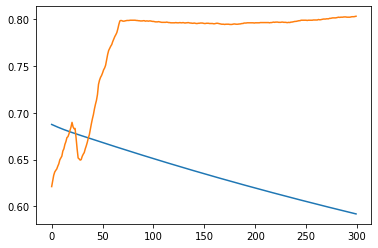

In [ ]:
experiment(512,16,300,verbose=True,exp="reverse")

{'LLR': tensor(0.7530), 'before': tensor(0.5698), 'random': tensor(0.8560)}

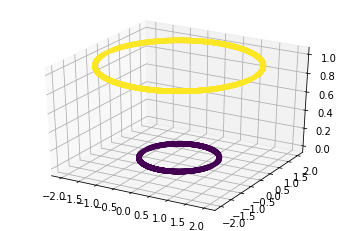

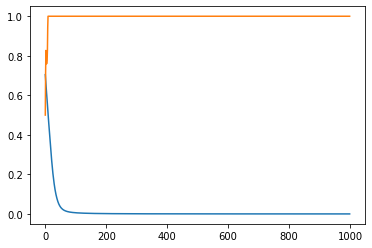

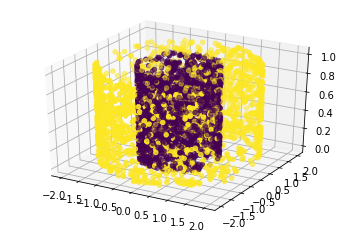

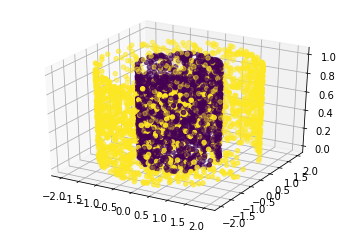

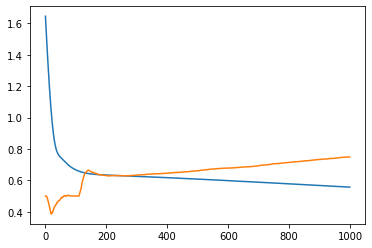

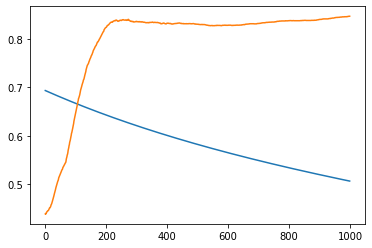

In [ ]:
experiment(512,16,1000,verbose=True,exp="rand")

{'LLR': tensor(0.7380), 'before': tensor(0.4922), 'random': tensor(0.8370)}

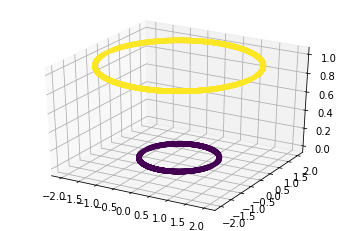

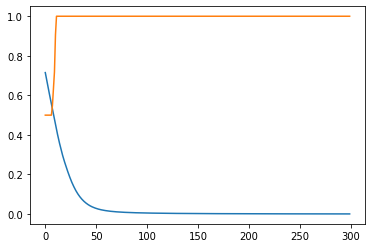

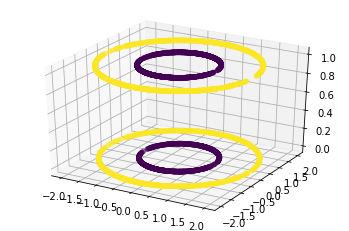

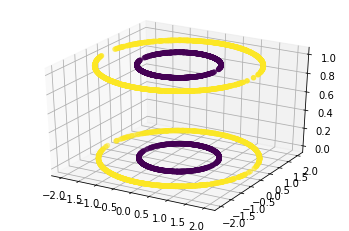

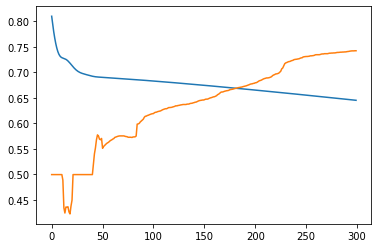

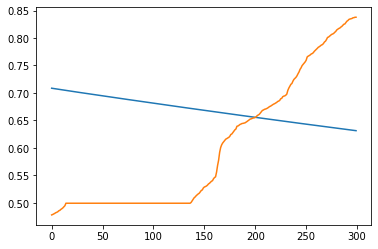

In [ ]:
experiment(512,16,300,verbose=True,exp="alternate")

{'LLR': tensor(1.), 'before': tensor(1.), 'random': tensor(0.6450)}

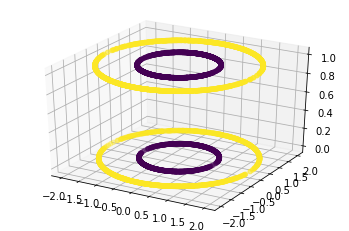

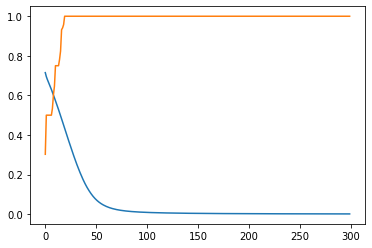

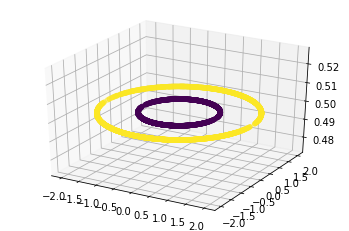

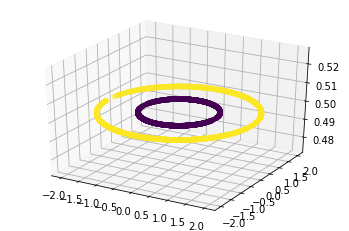

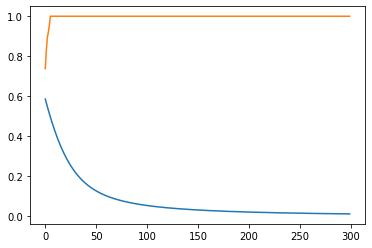

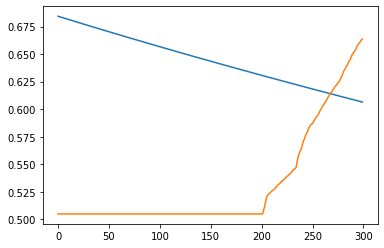

In [ ]:
experiment(512,16,300,corr=0.5,verbose=True,exp="mid")

{'LLR': tensor(1.), 'before': tensor(1.), 'random': tensor(0.6275)}

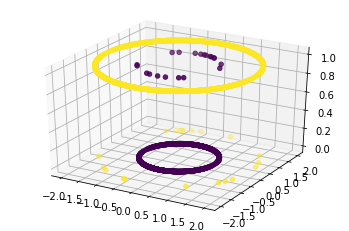

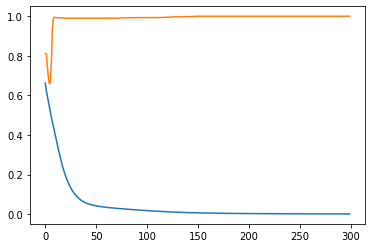

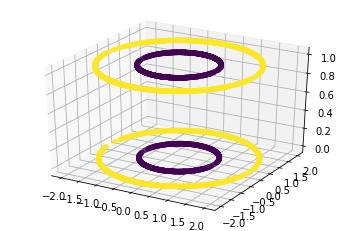

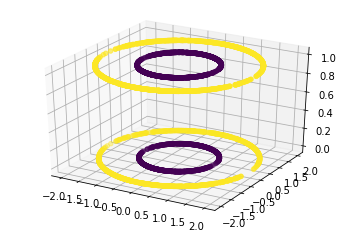

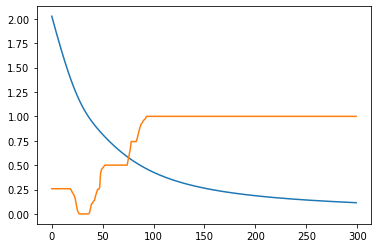

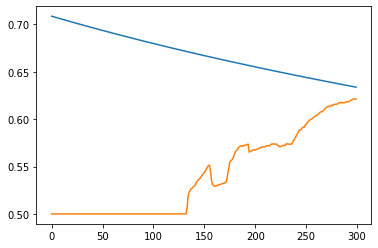

In [ ]:
experiment(512,16,300,corr=0.99,verbose=True,exp="alternate")

{'LLR': tensor(1.), 'before': tensor(1.), 'random': tensor(0.5447)}

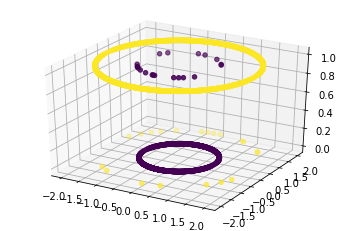

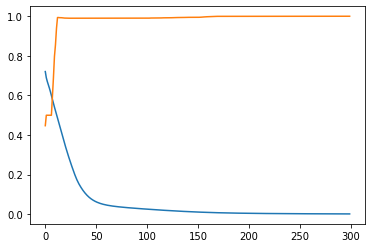

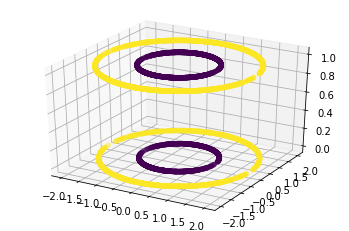

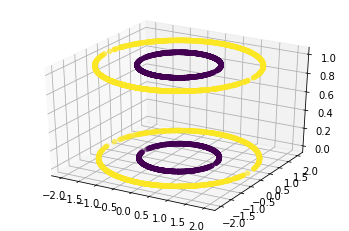

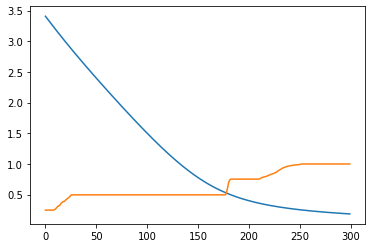

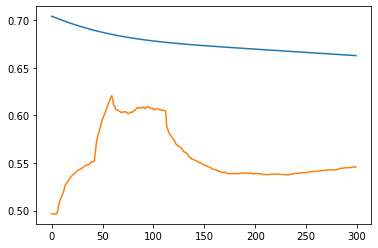

In [ ]:
experiment(512,8,300,corr=0.99,verbose=True,exp="alternate")

{'LLR': tensor(1.), 'before': tensor(0.9995), 'random': tensor(0.7632)}

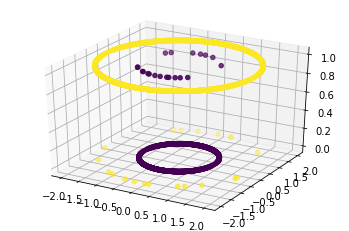

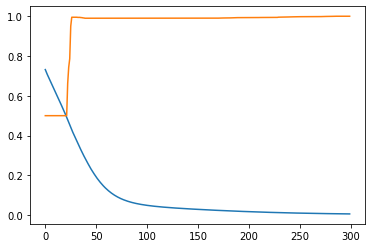

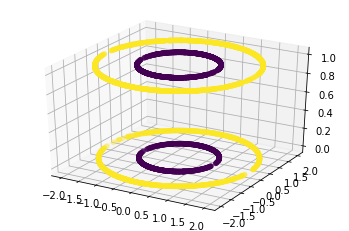

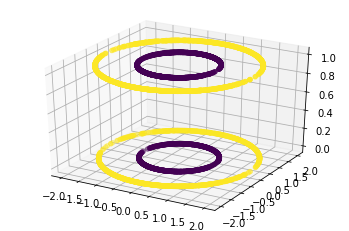

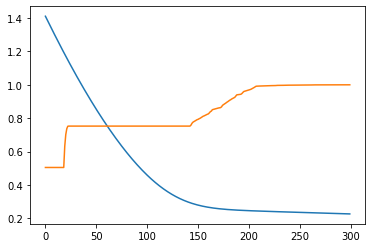

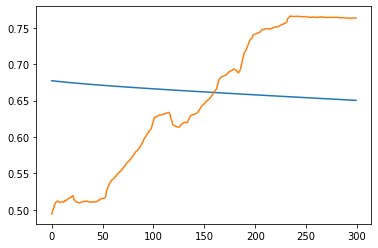

In [ ]:
experiment(512,4,300,corr=0.99,verbose=True,exp="alternate")

{'LLR': tensor(1.), 'before': tensor(1.), 'random': tensor(0.4950)}

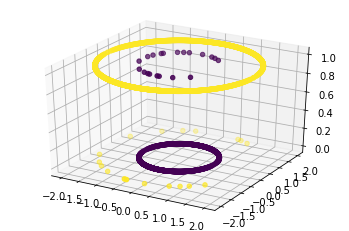

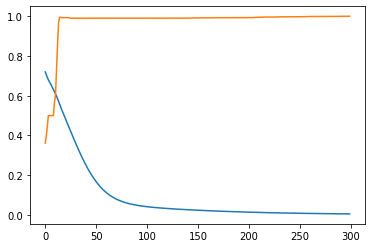

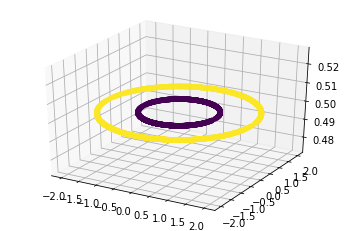

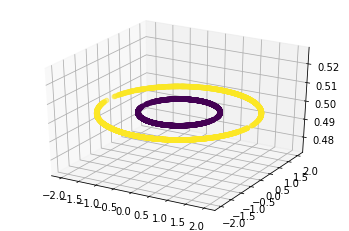

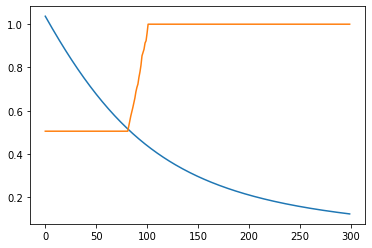

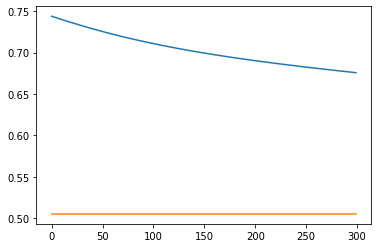

In [ ]:
experiment(512,4,300,corr=0.99,verbose=True,exp="mid")

{'LLR': tensor(1.), 'before': tensor(1.), 'random': tensor(0.6513)}

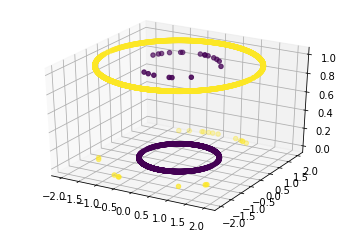

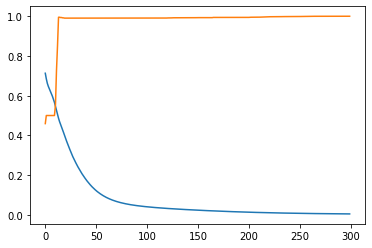

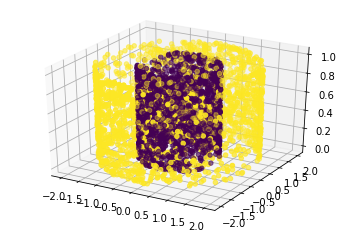

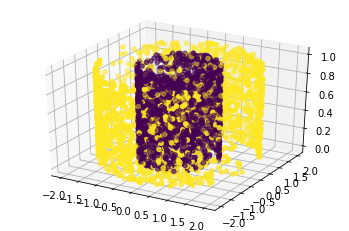

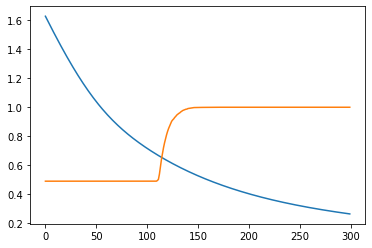

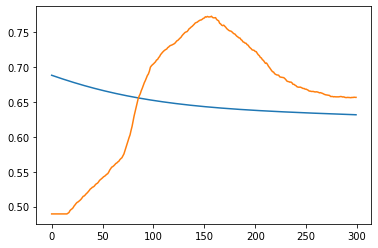

In [ ]:
experiment(512,4,300,corr=0.99,verbose=True,exp="rand")

{'LLR': tensor(1.), 'before': tensor(1.), 'random': tensor(0.5947)}

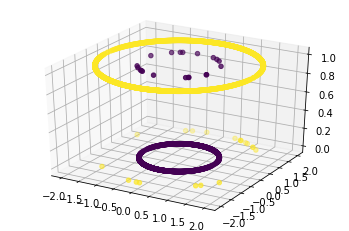

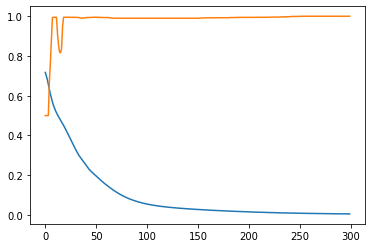

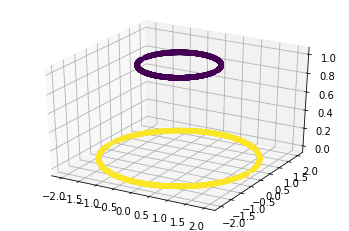

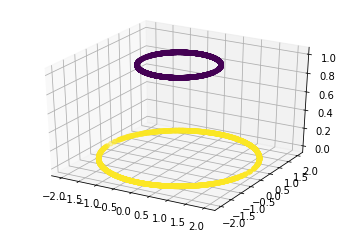

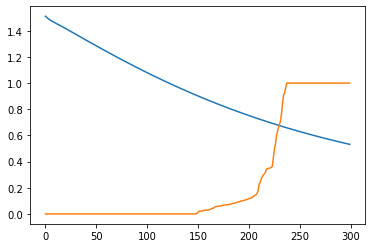

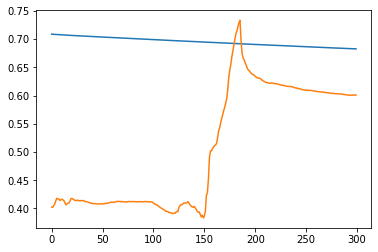

In [ ]:
experiment(512,4,300,corr=0.99,verbose=True,exp="reverse")

{'LLR': tensor(0.4605), 'before': tensor(0.8325), 'random': tensor(0.5692)}

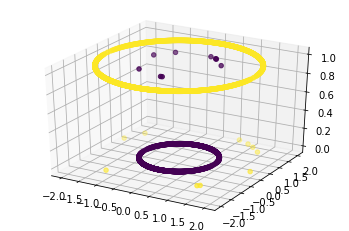

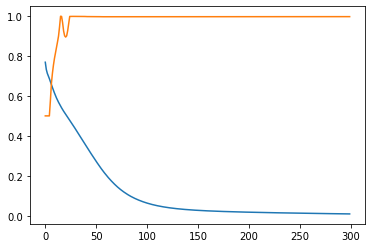

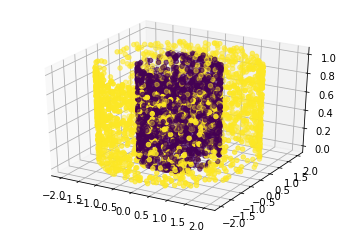

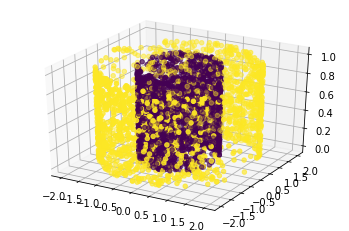

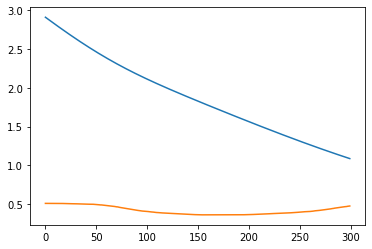

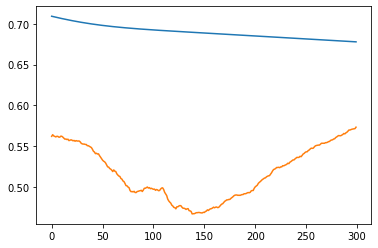

In [ ]:
experiment(512,4,300,corr=0.995,verbose=True,exp="rand")

{'LLR': tensor(0.7735), 'before': tensor(0.8160), 'random': tensor(0.6173)}

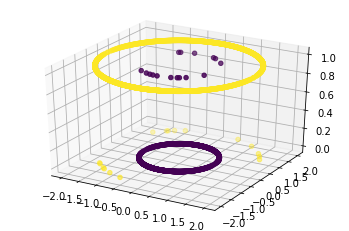

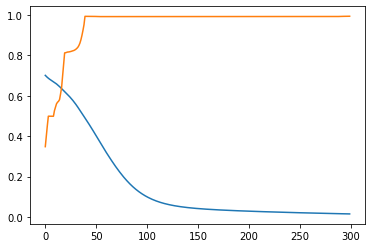

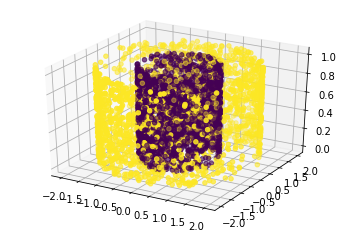

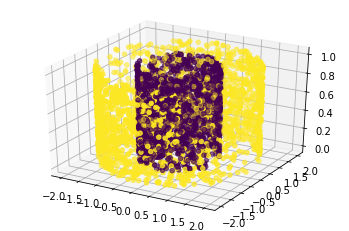

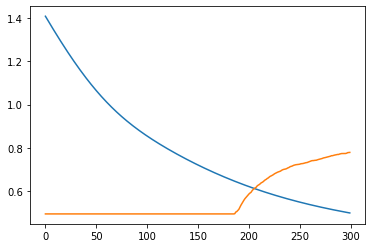

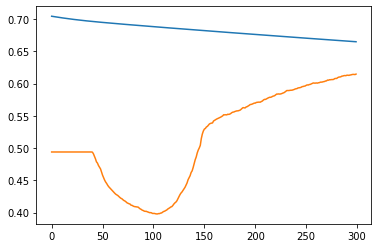

In [ ]:
experiment(128,8,300,corr=0.992,verbose=True,exp="rand")

{'LLR': tensor(0.9273), 'before': tensor(0.7870), 'random': tensor(0.6403)}

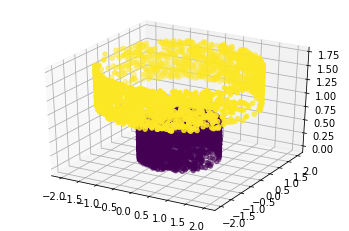

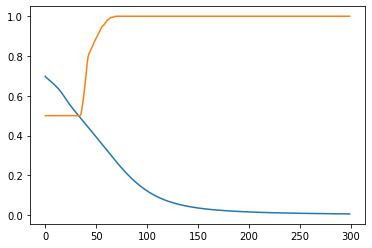

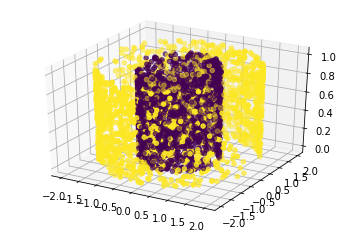

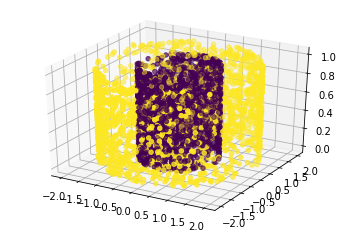

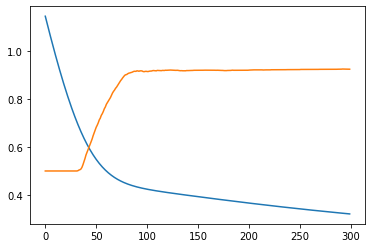

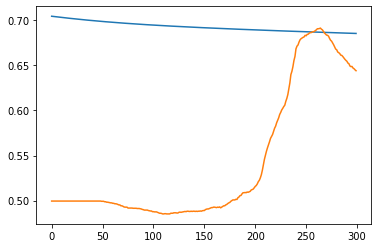

In [ ]:
experiment(256,4,300,corr=1,noise=0.7,verbose=True,exp="rand")

In [ ]:
import pandas as pd
def grid_noise(noise_min,noise_max,exp,points=10,exp_times=5):
  step = int(noise_max-noise_min)
  experiments = []
  for noise in range(int(noise_min*points),int(noise_max*points),step):
    noise = noise/points
    agg = None
    for _ in range(exp_times):
      result = experiment(512,4,exp=exp,noise=noise,corr=1)
      if agg is None:
        agg = result
      else:
        for k,v in result.items():
          agg[k]+=v # aggregate results for mean
    for k in agg:
      agg[k] /= exp_times
    agg.update({'noise':noise})
    experiments.append(agg)
  return pd.DataFrame(experiments)

In [ ]:
df = grid_noise(0.1,1.1,exp="rand")
df

before             LLR          random  noise
0  tensor(0.6029)  tensor(0.5765)  tensor(0.5994)    0.1
1  tensor(0.5855)  tensor(0.5856)  tensor(0.5469)    0.2
2  tensor(0.6317)  tensor(0.6453)  tensor(0.5811)    0.3
3  tensor(0.6339)  tensor(0.6257)  tensor(0.6185)    0.4
4  tensor(0.6704)  tensor(0.6230)  tensor(0.6138)    0.5
5  tensor(0.6934)  tensor(0.7122)  tensor(0.6337)    0.6
6  tensor(0.7478)  tensor(0.7545)  tensor(0.5340)    0.7
7  tensor(0.8047)  tensor(0.7926)  tensor(0.5957)    0.8
8  tensor(0.8684)  tensor(0.8497)  tensor(0.5681)    0.9
9  tensor(0.9038)  tensor(0.8868)  tensor(0.5416)    1.0

In [ ]:
experiment(256,4,corr=1,noise=0.2,exp="reverse",verbose=True)

{'LLR': tensor(1.), 'before': tensor(1.), 'random': tensor(0.7028)}

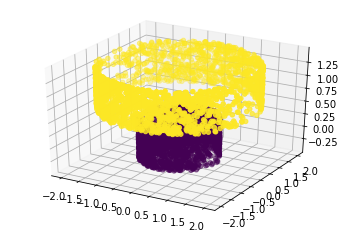

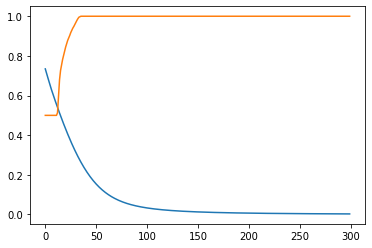

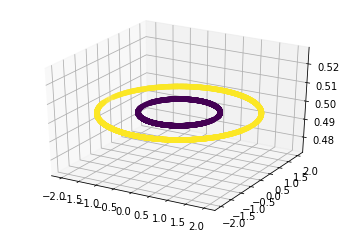

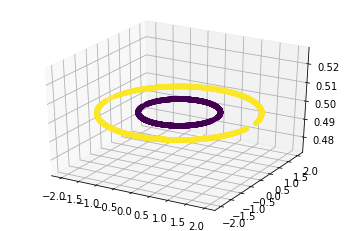

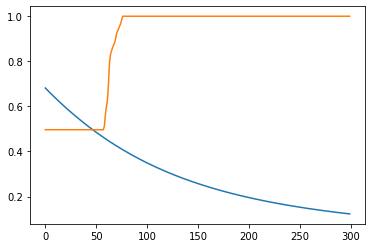

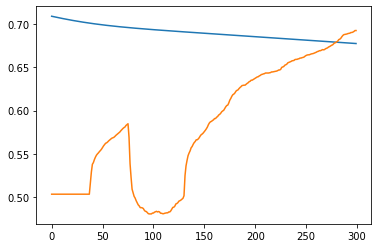

In [ ]:
experiment(512,4,corr=1,noise=0.8,exp="mid",verbose=True)

In [ ]:
df = grid_noise(0.1,1.1,exp="reverse")
df

before             LLR          random  noise
0  tensor(0.2027)  tensor(0.7972)  tensor(0.6829)    0.1
1  tensor(0.0992)  tensor(0.9008)  tensor(0.6395)    0.2
2  tensor(0.3014)  tensor(0.6557)  tensor(0.5835)    0.3
3  tensor(0.2018)  tensor(0.8476)  tensor(0.7574)    0.4
4      tensor(0.)  tensor(0.8372)  tensor(0.6079)    0.5
5      tensor(0.)  tensor(0.7004)  tensor(0.6591)    0.6
6  tensor(0.1015)  tensor(0.8698)  tensor(0.5855)    0.7
7  tensor(0.0989)  tensor(0.8453)  tensor(0.6947)    0.8
8  tensor(0.3489)  tensor(0.7001)  tensor(0.6556)    0.9
9  tensor(0.4780)  tensor(0.6122)  tensor(0.6077)    1.0

In [ ]:
df = grid_noise(0.1,1.1,exp="alternate")
df

before             LLR          random  noise
0  tensor(0.6007)  tensor(0.6035)  tensor(0.6066)    0.1
1  tensor(0.6408)  tensor(0.6441)  tensor(0.6615)    0.2
2  tensor(0.5473)  tensor(0.5799)  tensor(0.5502)    0.3
3  tensor(0.5470)  tensor(0.6051)  tensor(0.5090)    0.4
4  tensor(0.5027)  tensor(0.5625)  tensor(0.6199)    0.5
5  tensor(0.6482)  tensor(0.5694)  tensor(0.5859)    0.6
6  tensor(0.5005)  tensor(0.5088)  tensor(0.6165)    0.7
7  tensor(0.5879)  tensor(0.5408)  tensor(0.6303)    0.8
8  tensor(0.5537)  tensor(0.6342)  tensor(0.5419)    0.9
9  tensor(0.8048)  tensor(0.7630)  tensor(0.6276)    1.0

In [ ]:
df = grid_noise(0.1,1.1,exp="mid")
df

before             LLR          random  noise
0  tensor(0.6482)  tensor(0.6478)  tensor(0.5558)    0.1
1  tensor(0.8001)  tensor(0.7595)  tensor(0.6509)    0.2
2  tensor(0.7989)  tensor(0.7989)  tensor(0.5379)    0.3
3  tensor(0.9018)  tensor(0.7779)  tensor(0.5452)    0.4
4  tensor(0.7995)  tensor(0.8019)  tensor(0.6346)    0.5
5  tensor(0.7010)  tensor(0.7434)  tensor(0.6180)    0.6
6  tensor(0.7990)  tensor(0.8009)  tensor(0.5632)    0.7
7  tensor(0.7990)  tensor(0.8997)  tensor(0.6075)    0.8
8      tensor(1.)      tensor(1.)  tensor(0.6398)    0.9
9      tensor(1.)  tensor(0.8004)  tensor(0.5177)    1.0

{'LLR': tensor(0.9398), 'before': tensor(0.8255), 'random': tensor(0.5353)}

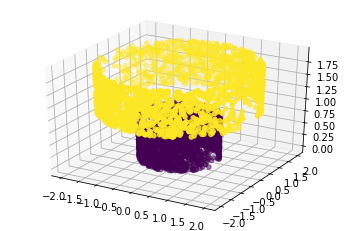

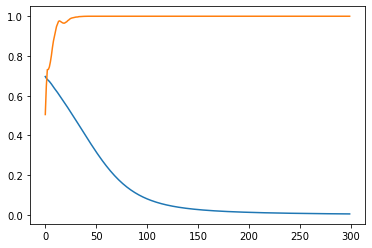

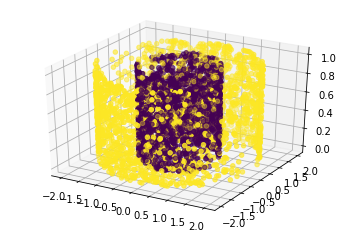

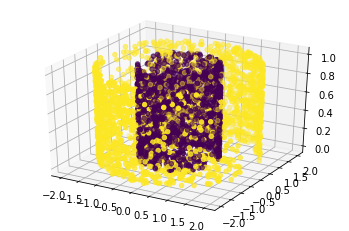

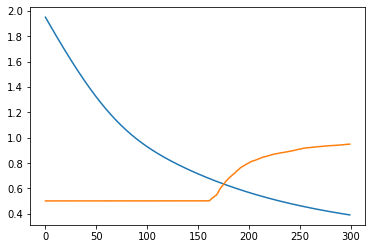

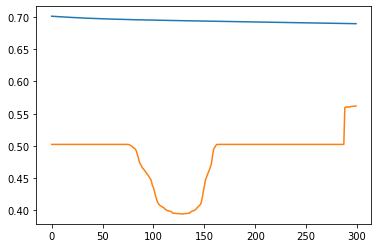

In [ ]:
experiment(256,4,300,corr=1,noise=0.9,verbose=True,exp="rand")

{'LLR': tensor(0.8457), 'before': tensor(0.4958), 'random': tensor(0.8052)}

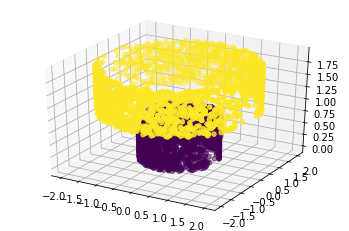

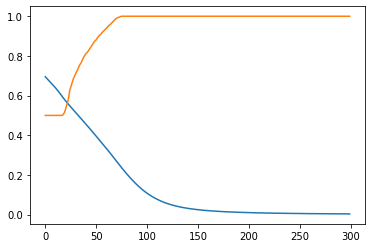

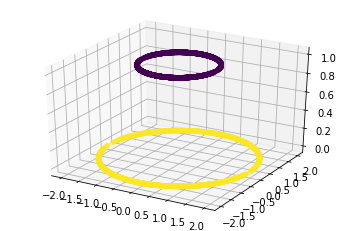

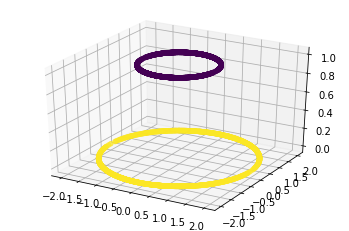

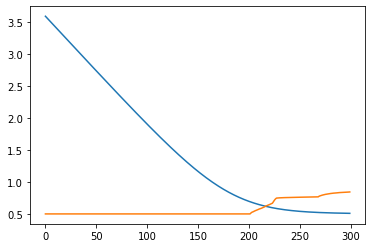

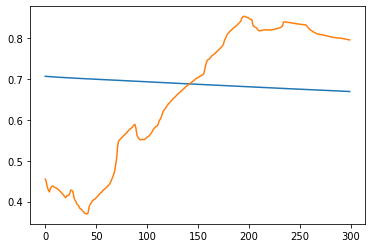

In [ ]:
experiment(256,4,300,corr=1,noise=0.9,verbose=True,exp="reverse")

In [ ]:
from toy_3d import grid_nodes

In [ ]:
df = grid_nodes(16,256,4,16,exp="mid")
df

before             LLR          random  hidden  bottle
0   tensor(0.7501)  tensor(0.8437)  tensor(0.6090)      16       4
1   tensor(0.8898)  tensor(0.8337)  tensor(0.5698)      16       6
2   tensor(0.7971)  tensor(0.8059)  tensor(0.6262)      16       8
3   tensor(0.9913)  tensor(0.9435)  tensor(0.6078)      16      10
4   tensor(0.9330)  tensor(0.9550)  tensor(0.7177)      16      12
5   tensor(0.8995)  tensor(0.9497)  tensor(0.8547)      16      14
6       tensor(1.)  tensor(0.8884)  tensor(0.6097)      64       4
7       tensor(1.)  tensor(0.9979)  tensor(0.5743)      64       6
8       tensor(1.)      tensor(1.)  tensor(0.6595)      64       8
9       tensor(1.)      tensor(1.)  tensor(0.6363)      64      10
10      tensor(1.)      tensor(1.)  tensor(0.7904)      64      12
11      tensor(1.)      tensor(1.)  tensor(0.8142)      64      14
12  tensor(0.9004)  tensor(0.9105)  tensor(0.5356)     112       4
13      tensor(1.)      tensor(1.)  tensor(0.6545)     112       6
14      tensor(1.)      tensor(1.)  tensor(0.7678)     112       8
15      tensor(1.)      tensor(1.)  tensor(0.6866)     112      10
16      tensor(1.)      tensor(1.)  tensor(0.7119)     112      12
17      tensor(1.)      tensor(1.)  tensor(0.7581)     112      14
18  tensor(0.7990)  tensor(0.7964)  tensor(0.5249)     160       4
19      tensor(1.)  tensor(0.8191)  tensor(0.6179)     160       6
20      tensor(1.)      tensor(1.)  tensor(0.5641)     160       8
21      tensor(1.)      tensor(1.)  tensor(0.7393)     160      10
22      tensor(1.)      tensor(1.)  tensor(0.6317)     160      12
23      tensor(1.)      tensor(1.)  tensor(0.7349)     160      14
24  tensor(0.8081)  tensor(0.8490)  tensor(0.5853)     208       4
25  tensor(0.9026)  tensor(0.9224)  tensor(0.6029)     208       6
26  tensor(0.9260)  tensor(0.9294)  tensor(0.6443)     208       8
27      tensor(1.)      tensor(1.)  tensor(0.7891)     208      10
28      tensor(1.)      tensor(1.)  tensor(0.7599)     208      12
29      tensor(1.)      tensor(1.)  tensor(0.7037)     208      14

In [ ]:
df['diff'] = df['LLR'] - df['before']

In [ ]:
df.sort_values('diff',ascending=False)

before             LLR          random  hidden  bottle  \
0   tensor(0.7501)  tensor(0.8437)  tensor(0.6090)      16       4   
5   tensor(0.8995)  tensor(0.9497)  tensor(0.8547)      16      14   
24  tensor(0.8081)  tensor(0.8490)  tensor(0.5853)     208       4   
4   tensor(0.9330)  tensor(0.9550)  tensor(0.7177)      16      12   
25  tensor(0.9026)  tensor(0.9224)  tensor(0.6029)     208       6   
12  tensor(0.9004)  tensor(0.9105)  tensor(0.5356)     112       4   
2   tensor(0.7971)  tensor(0.8059)  tensor(0.6262)      16       8   
26  tensor(0.9260)  tensor(0.9294)  tensor(0.6443)     208       8   
16      tensor(1.)      tensor(1.)  tensor(0.7119)     112      12   
28      tensor(1.)      tensor(1.)  tensor(0.7599)     208      12   
27      tensor(1.)      tensor(1.)  tensor(0.7891)     208      10   
23      tensor(1.)      tensor(1.)  tensor(0.7349)     160      14   
22      tensor(1.)      tensor(1.)  tensor(0.6317)     160      12   
21      tensor(1.)      tensor(1.)  tensor(0.7393)     160      10   
20      tensor(1.)      tensor(1.)  tensor(0.5641)     160       8   
17      tensor(1.)      tensor(1.)  tensor(0.7581)     112      14   
15      tensor(1.)      tensor(1.)  tensor(0.6866)     112      10   
14      tensor(1.)      tensor(1.)  tensor(0.7678)     112       8   
13      tensor(1.)      tensor(1.)  tensor(0.6545)     112       6   
11      tensor(1.)      tensor(1.)  tensor(0.8142)      64      14   
10      tensor(1.)      tensor(1.)  tensor(0.7904)      64      12   
9       tensor(1.)      tensor(1.)  tensor(0.6363)      64      10   
8       tensor(1.)      tensor(1.)  tensor(0.6595)      64       8   
29      tensor(1.)      tensor(1.)  tensor(0.7037)     208      14   
7       tensor(1.)  tensor(0.9979)  tensor(0.5743)      64       6   
18  tensor(0.7990)  tensor(0.7964)  tensor(0.5249)     160       4   
3   tensor(0.9913)  tensor(0.9435)  tensor(0.6078)      16      10   
1   tensor(0.8898)  tensor(0.8337)  tensor(0.5698)      16       6   
6       tensor(1.)  tensor(0.8884)  tensor(0.6097)      64       4   
19      tensor(1.)  tensor(0.8191)  tensor(0.6179)     160       6   

               diff  
0    tensor(0.0936)  
5    tensor(0.0502)  
24   tensor(0.0408)  
4    tensor(0.0221)  
25   tensor(0.0198)  
12   tensor(0.0100)  
2    tensor(0.0088)  
26   tensor(0.0034)  
16       tensor(0.)  
28       tensor(0.)  
27       tensor(0.)  
23       tensor(0.)  
22       tensor(0.)  
21       tensor(0.)  
20       tensor(0.)  
17       tensor(0.)  
15       tensor(0.)  
14       tensor(0.)  
13       tensor(0.)  
11       tensor(0.)  
10       tensor(0.)  
9        tensor(0.)  
8        tensor(0.)  
29       tensor(0.)  
7   tensor(-0.0021)  
18  tensor(-0.0026)  
3   tensor(-0.0477)  
1   tensor(-0.0561)  
6   tensor(-0.1116)  
19  tensor(-0.1809)

In [ ]:
experiment(256,4,25,corr=1,noise=0,verbose=False,exp="mid")

{'LLR': tensor(0.5123), 'before': tensor(0.4877), 'random': tensor(0.4877)}

In [ ]:
from toy_3d import experiment

In [ ]:
experiment(256,4,25,corr=1,noise=0,verbose=False,exp="mid")

{'LLR': tensor(0.7600), 'before': tensor(0.5055), 'random': tensor(0.7088)}

In [ ]:
experiment(256,100,100,100,noise=0,verbose=False,exp="mid")

{'LLR': tensor(1.), 'before': tensor(1.), 'random': tensor(0.8580)}

In [ ]:
for _ in range(10):
  print(experiment(256,4,25,corr=1,noise=0,verbose=False,exp="mid"))

TypeError: ignored

{'LLR': tensor(1.), 'before': tensor(1.), 'random': tensor(0.7390)}

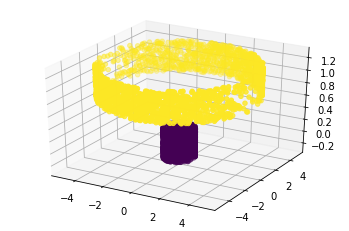

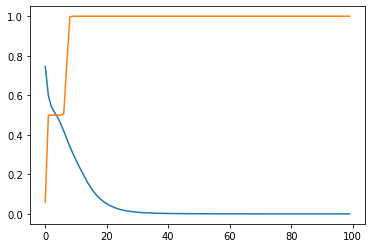

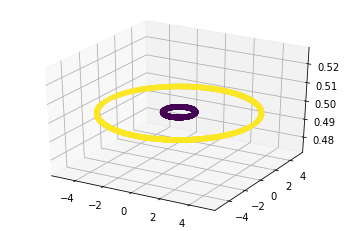

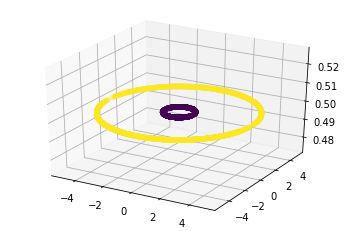

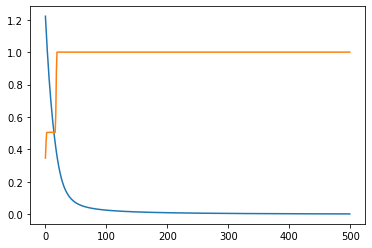

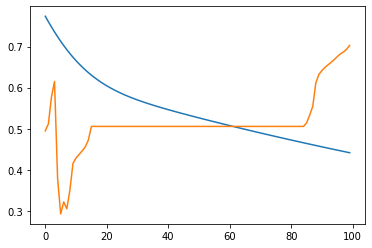

In [ ]:
experiment(hidden_units=500,bottleneck=100,epochs=100,pt_epochs=500,outer_radius=5,noise=0.5,verbose=True,exp="mid")

{'LLR': tensor(1.), 'before': tensor(0.5095), 'random': tensor(0.6212)}

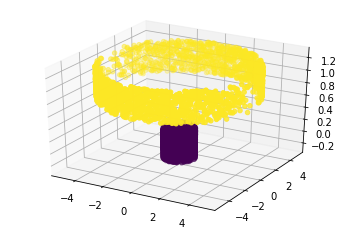

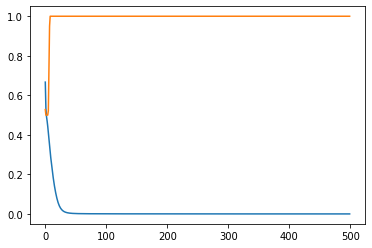

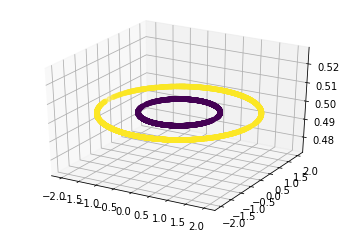

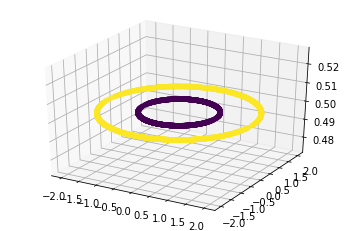

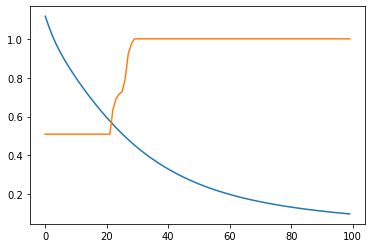

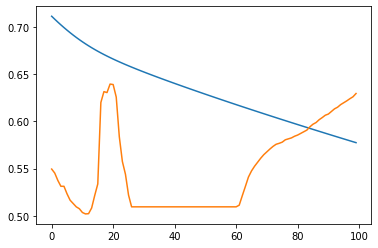

In [ ]:
experiment(hidden_units=500,bottleneck=100,epochs=100,pt_epochs=500,outer_r=5,noise=0.5,verbose=True,exp="mid")

In [ ]:
import pandas as pd
def grid_kwarg(x_min,x_max,arg,default_args,points=10,exp_times=5):
  step = int(x_max-x_min)
  experiments = []
  for x in range(int(x_min*points),int(x_max*points),step):
    x = x/points
    if arg != "noise" and arg != "outer_r":
      x = int(x)
    agg = None
    for _ in range(exp_times):
      default_args[arg]=x
      result = experiment(**default_args)
      if agg is None:
        agg = result
      else:
        for k,v in result.items():
          agg[k]+=v # aggregate results for mean
    for k in agg:
      agg[k] /= exp_times
    agg.update({arg:x})
    experiments.append(agg)
  return pd.DataFrame(experiments)

In [ ]:
default = {'hidden_units':500,"bottleneck":100,"epochs":100,"pt_epochs":500,"outer_r":5,"noise":0.5,"verbose":False,"exp":"mid"}

In [ ]:
experiment(**default)

{'LLR': tensor(1.), 'before': tensor(0.4988), 'random': tensor(0.7975)}

In [ ]:
df = grid_kwarg(10,10000,"hidden_units",default,points=5)

In [ ]:
df

before             LLR          random  hidden_units
0  tensor(0.5276)  tensor(0.9965)  tensor(0.9362)            10
1  tensor(0.4997)      tensor(1.)  tensor(0.8159)          2008
2  tensor(0.4971)      tensor(1.)  tensor(0.8643)          4006
3  tensor(0.5145)      tensor(1.)  tensor(0.8249)          6004
4  tensor(0.5242)      tensor(1.)  tensor(0.7379)          8002

In [ ]:
df = grid_kwarg(1,100,"hidden_units",default,points=10)
df

before             LLR          random  hidden_units
0  tensor(0.7003)  tensor(0.7477)  tensor(0.6352)             1
1  tensor(0.4999)  tensor(0.9988)  tensor(0.8767)            10
2  tensor(0.4986)      tensor(1.)  tensor(0.9312)            20
3  tensor(0.4990)      tensor(1.)  tensor(0.9447)            30
4  tensor(0.5020)      tensor(1.)  tensor(0.8751)            40
5  tensor(0.5044)      tensor(1.)  tensor(0.7235)            50
6  tensor(0.5016)      tensor(1.)  tensor(0.7846)            60
7  tensor(0.5012)      tensor(1.)  tensor(0.8766)            70
8  tensor(0.4986)      tensor(1.)  tensor(0.8150)            80
9  tensor(0.4994)      tensor(1.)  tensor(0.8631)            90

In [ ]:
df = grid_kwarg(1,20,"hidden_units",default,points=10)
df

before             LLR          random  hidden_units
0  tensor(0.6898)  tensor(0.7030)  tensor(0.6168)             1
1  tensor(0.8353)  tensor(0.9043)  tensor(0.6745)             2
2  tensor(0.5019)  tensor(0.9842)  tensor(0.8178)             4
3  tensor(0.5052)  tensor(0.9613)  tensor(0.8656)             6
4  tensor(0.4985)  tensor(0.9825)  tensor(0.8879)             8
5  tensor(0.5026)  tensor(0.9721)  tensor(0.8755)            10
6  tensor(0.4972)  tensor(0.9941)  tensor(0.9689)            12
7  tensor(0.4977)  tensor(0.9961)  tensor(0.8506)            14
8  tensor(0.5095)  tensor(0.9982)  tensor(0.9147)            16
9  tensor(0.5039)      tensor(1.)  tensor(0.9420)            18

In [ ]:
df = grid_kwarg(1,100,"bottleneck",default,points=20)
df

before             LLR          random  bottleneck
0   tensor(0.6992)  tensor(0.4010)  tensor(0.5211)           1
1   tensor(0.5989)  tensor(0.3994)  tensor(0.5167)           5
2   tensor(0.5034)  tensor(0.5567)  tensor(0.4384)          10
3   tensor(0.5033)  tensor(0.8988)  tensor(0.5830)          15
4   tensor(0.5035)      tensor(1.)  tensor(0.6769)          20
5   tensor(0.4934)      tensor(1.)  tensor(0.6668)          25
6   tensor(0.5025)      tensor(1.)  tensor(0.6249)          30
7   tensor(0.5024)      tensor(1.)  tensor(0.5587)          35
8   tensor(0.4964)      tensor(1.)  tensor(0.6272)          40
9   tensor(0.5013)      tensor(1.)  tensor(0.5835)          45
10  tensor(0.5002)      tensor(1.)  tensor(0.6757)          50
11  tensor(0.5020)      tensor(1.)  tensor(0.5408)          55
12  tensor(0.5000)      tensor(1.)  tensor(0.6176)          60
13  tensor(0.5021)      tensor(1.)  tensor(0.6291)          65
14  tensor(0.5044)      tensor(1.)  tensor(0.6562)          70
15  tensor(0.5012)      tensor(1.)  tensor(0.7646)          75
16  tensor(0.5010)      tensor(1.)  tensor(0.6714)          80
17  tensor(0.4942)      tensor(1.)  tensor(0.8362)          85
18  tensor(0.5018)      tensor(1.)  tensor(0.7379)          90
19  tensor(0.5035)      tensor(1.)  tensor(0.6921)          95

In [ ]:
df = grid_kwarg(1,22,"bottleneck",default,points=10)

In [ ]:
df

before             LLR          random  bottleneck
0  tensor(0.6012)  tensor(0.5007)  tensor(0.5088)           1
1  tensor(0.7025)  tensor(0.4962)  tensor(0.5084)           3
2  tensor(0.6014)  tensor(0.6021)  tensor(0.5246)           5
3  tensor(0.4970)  tensor(0.8015)  tensor(0.5565)           7
4  tensor(0.4994)  tensor(0.8037)  tensor(0.6137)           9
5  tensor(0.4992)  tensor(0.7009)  tensor(0.6180)          11
6  tensor(0.4976)  tensor(0.7038)  tensor(0.6108)          13
7  tensor(0.4967)      tensor(1.)  tensor(0.5414)          15
8  tensor(0.5009)      tensor(1.)  tensor(0.5589)          17
9  tensor(0.4989)      tensor(1.)  tensor(0.6170)          19

In [ ]:
df = grid_kwarg(5,16,"bottleneck",default,points=10)
df

before             LLR          random  bottleneck
0  tensor(0.5000)  tensor(0.7004)  tensor(0.4866)           5
1  tensor(0.5102)  tensor(0.7084)  tensor(0.5824)           6
2  tensor(0.6011)  tensor(0.5177)  tensor(0.5731)           7
3  tensor(0.5049)  tensor(0.8996)  tensor(0.5059)           8
4  tensor(0.5958)  tensor(0.5623)  tensor(0.5517)           9
5  tensor(0.5037)  tensor(0.7996)  tensor(0.6060)          10
6  tensor(0.5012)  tensor(0.8148)  tensor(0.6179)          11
7  tensor(0.4951)  tensor(0.8943)  tensor(0.5767)          12
8  tensor(0.5962)  tensor(0.8995)  tensor(0.5662)          13
9  tensor(0.7020)  tensor(0.7730)  tensor(0.6550)          14

In [ ]:
df = grid_kwarg(5,16,"bottleneck",default,points=10)
df

before             LLR          random  bottleneck
0  tensor(0.5965)      tensor(1.)  tensor(0.5326)           5
1  tensor(0.5021)  tensor(0.8532)  tensor(0.5789)           6
2  tensor(0.5994)      tensor(1.)  tensor(0.6533)           7
3  tensor(0.6994)      tensor(1.)  tensor(0.5028)           8
4  tensor(0.4972)      tensor(1.)  tensor(0.5976)           9
5  tensor(0.5011)      tensor(1.)  tensor(0.5400)          10
6  tensor(0.5976)      tensor(1.)  tensor(0.6184)          11
7  tensor(0.6014)      tensor(1.)  tensor(0.5504)          12
8  tensor(0.5020)      tensor(1.)  tensor(0.6924)          13
9  tensor(0.5005)      tensor(1.)  tensor(0.5977)          14

In [ ]:
default['bottleneck']=15
experiment(**default)

{'LLR': tensor(1.), 'before': tensor(0.4950), 'random': tensor(0.7642)}

In [ ]:
experiment(**default)

{'LLR': tensor(1.), 'before': tensor(0.5075), 'random': tensor(0.4925)}

In [ ]:
default = {'hidden_units':500,"bottleneck":100,"epochs":100,"pt_epochs":500,"outer_r":5,"noise":0.5,"verbose":False,"exp":"mid"}

In [ ]:
df = grid_kwarg(0,2.1,"noise",default,points=20)
df

before         LLR          random  noise
0   tensor(0.5009)  tensor(1.)  tensor(0.7505)    0.0
1   tensor(0.5026)  tensor(1.)  tensor(0.7547)    0.1
2   tensor(0.5024)  tensor(1.)  tensor(0.8152)    0.2
3   tensor(0.5081)  tensor(1.)  tensor(0.6244)    0.3
4   tensor(0.4990)  tensor(1.)  tensor(0.7855)    0.4
5   tensor(0.4989)  tensor(1.)  tensor(0.6814)    0.5
6   tensor(0.5022)  tensor(1.)  tensor(0.8371)    0.6
7   tensor(0.5040)  tensor(1.)  tensor(0.8118)    0.7
8   tensor(0.4999)  tensor(1.)  tensor(0.8677)    0.8
9   tensor(0.4976)  tensor(1.)  tensor(0.8103)    0.9
10  tensor(0.4969)  tensor(1.)  tensor(0.7908)    1.0
11  tensor(0.5001)  tensor(1.)  tensor(0.7900)    1.1
12  tensor(0.4974)  tensor(1.)  tensor(0.7539)    1.2
13  tensor(0.5011)  tensor(1.)  tensor(0.8237)    1.3
14  tensor(0.5019)  tensor(1.)  tensor(0.7847)    1.4
15  tensor(0.4988)  tensor(1.)  tensor(0.8738)    1.5
16  tensor(0.5016)  tensor(1.)  tensor(0.8396)    1.6
17  tensor(0.4930)  tensor(1.)  tensor(0.9022)    1.7
18  tensor(0.4970)  tensor(1.)  tensor(0.8033)    1.8
19  tensor(0.5037)  tensor(1.)  tensor(0.7641)    1.9
20  tensor(0.5002)  tensor(1.)  tensor(0.7181)    2.0

In [ ]:
df = grid_kwarg(50,500,"pt_epochs",default,points=10)
df

before         LLR          random  pt_epochs
0  tensor(0.4972)  tensor(1.)  tensor(0.8467)         50
1  tensor(0.4951)  tensor(1.)  tensor(0.8245)         95
2  tensor(0.4999)  tensor(1.)  tensor(0.8569)        140
3  tensor(0.4976)  tensor(1.)  tensor(0.7530)        185
4  tensor(0.5051)  tensor(1.)  tensor(0.7025)        230
5  tensor(0.5019)  tensor(1.)  tensor(0.7892)        275
6  tensor(0.5003)  tensor(1.)  tensor(0.7722)        320
7  tensor(0.4976)  tensor(1.)  tensor(0.8471)        365
8  tensor(0.4985)  tensor(1.)  tensor(0.8863)        410
9  tensor(0.5015)  tensor(1.)  tensor(0.8297)        455

In [ ]:
df = grid_kwarg(1,5,"outer_r",default,points=10)
df

before             LLR          random  outer_r
0  tensor(0.1314)  tensor(0.9986)  tensor(0.8401)        1
1  tensor(0.1298)      tensor(1.)  tensor(0.7923)        1
2  tensor(0.2448)      tensor(1.)  tensor(0.7772)        1
3      tensor(1.)      tensor(1.)  tensor(0.8469)        2
4      tensor(1.)      tensor(1.)  tensor(0.7603)        2
5  tensor(0.9579)      tensor(1.)  tensor(0.7293)        3
6  tensor(0.9786)      tensor(1.)  tensor(0.8255)        3
7  tensor(0.9804)      tensor(1.)  tensor(0.7698)        3
8  tensor(0.5031)      tensor(1.)  tensor(0.8205)        4
9  tensor(0.5041)      tensor(1.)  tensor(0.8121)        4

In [ ]:
df = grid_kwarg(1,5,"outer_r",default,points=10)
df

before             LLR          random  outer_r
0  tensor(0.2177)  tensor(0.1731)  tensor(0.9254)      1.0
1  tensor(0.7880)  tensor(0.8598)  tensor(0.9208)      1.4
2  tensor(0.9499)  tensor(0.9948)  tensor(0.8402)      1.8
3      tensor(1.)      tensor(1.)  tensor(0.9116)      2.2
4  tensor(0.9944)      tensor(1.)  tensor(0.8994)      2.6
5  tensor(0.9238)  tensor(0.9980)  tensor(0.8964)      3.0
6  tensor(0.5759)      tensor(1.)  tensor(0.9002)      3.4
7  tensor(0.5627)      tensor(1.)  tensor(0.8806)      3.8
8  tensor(0.5156)      tensor(1.)  tensor(0.8798)      4.2
9  tensor(0.5022)  tensor(0.9989)  tensor(0.9281)      4.6

{'LLR': tensor(0.3475), 'before': tensor(0.), 'random': tensor(1.)}

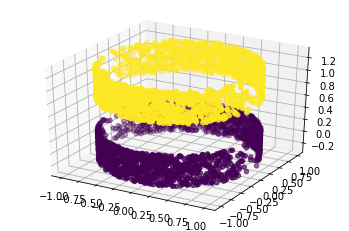

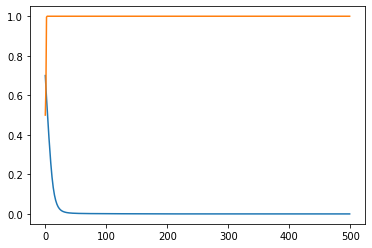

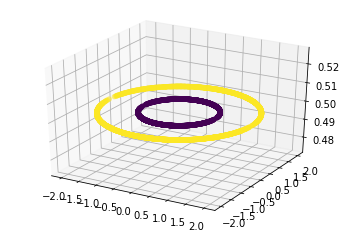

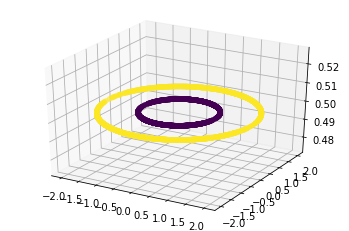

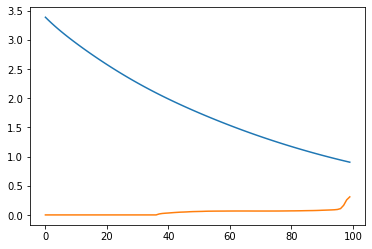

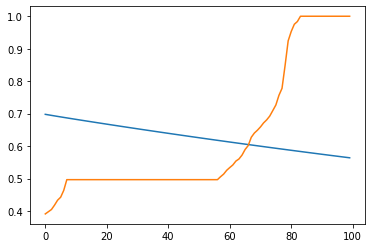

In [ ]:
experiment(hidden_units=500,bottleneck=100,epochs=100,pt_epochs=500,outer_r=1,noise=0.5,verbose=True,exp="mid")

{'LLR': tensor(1.), 'before': tensor(1.), 'random': tensor(0.7740)}

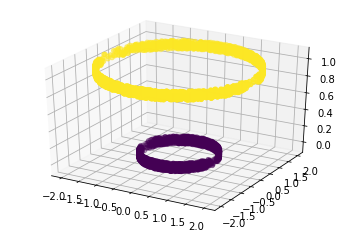

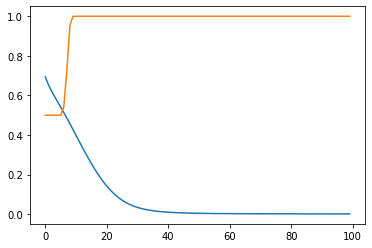

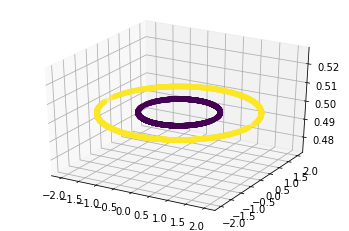

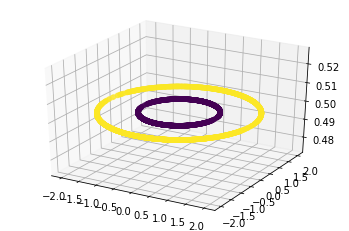

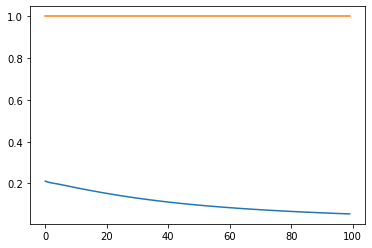

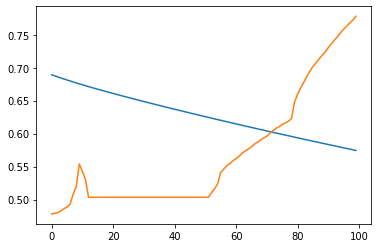

In [ ]:
experiment(256,100,100,100,noise=0.1,verbose=True,exp="mid")

{'LLR': tensor(1.), 'before': tensor(1.), 'random': tensor(0.8380)}

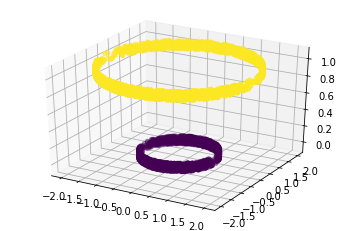

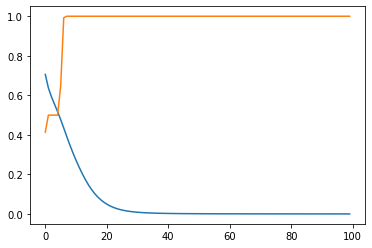

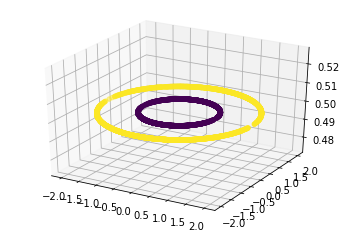

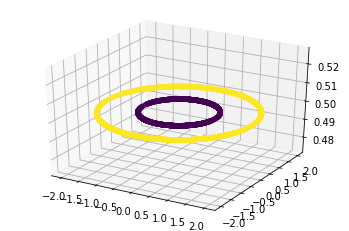

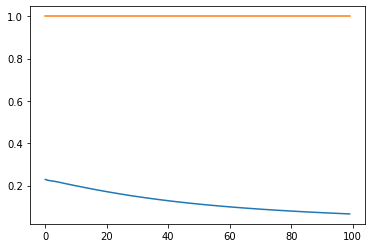

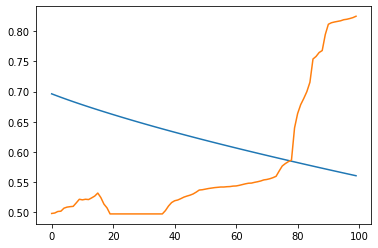

In [ ]:
experiment(500,100,100,100,noise=0.1,verbose=True,exp="mid")

{'LLR': tensor(1.), 'before': tensor(0.4857), 'random': tensor(1.)}

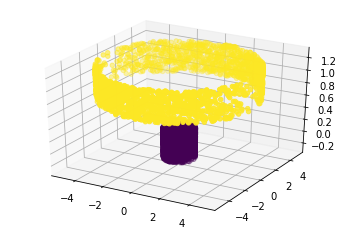

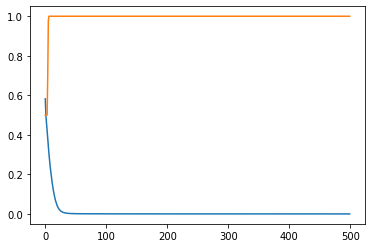

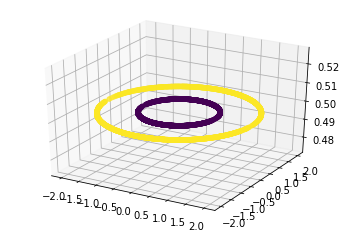

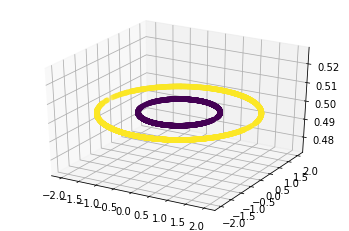

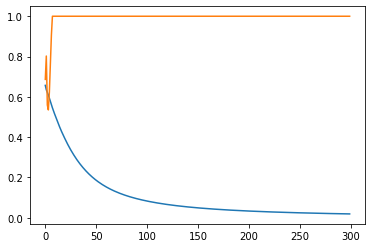

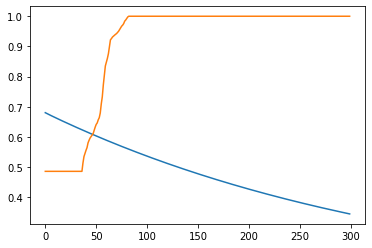

In [ ]:
experiment(hidden_units=500,bottleneck=100,epochs=300,pt_epochs=500,outer_r=5,noise=0.5,verbose=True,exp="mid")

Tuning only bias

In [ ]:
from toy_3d import experiment

{'LLR': tensor(0.5020), 'before': tensor(0.5020), 'random': tensor(0.6100)}

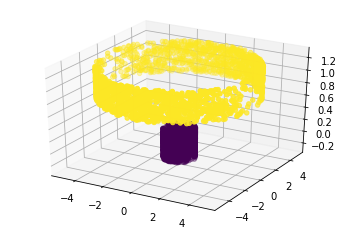

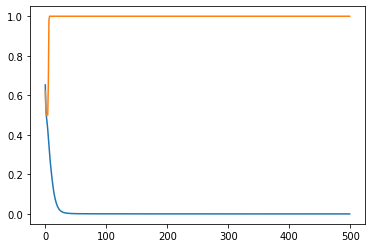

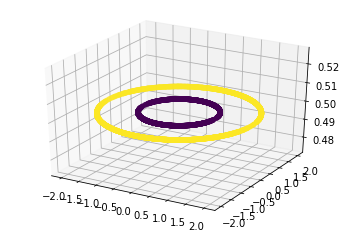

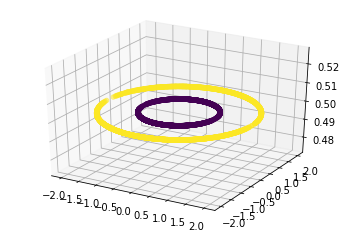

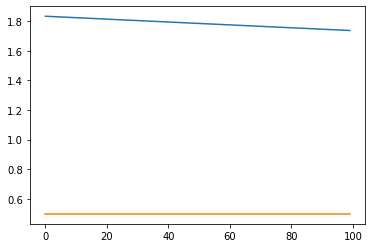

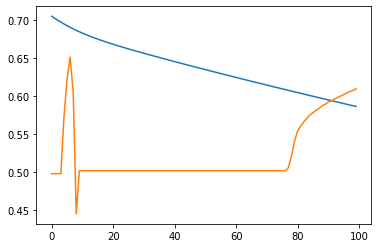

In [ ]:
experiment(hidden_units=500,bottleneck=100,epochs=100,pt_epochs=500,outer_r=5,noise=0.5,verbose=True,exp="mid")

Testing refactored code

In [ ]:
from experiments import experiment, grid_kwarg, average_over_exps
from models import bottleNN,bottleNN_bias
from datasets import get_dataset

{'LLR': tensor(1.), 'before': tensor(0.5033), 'random': tensor(1.)}

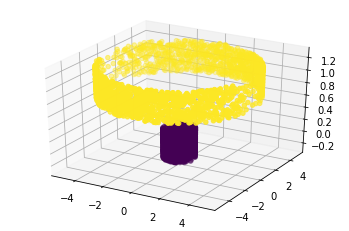

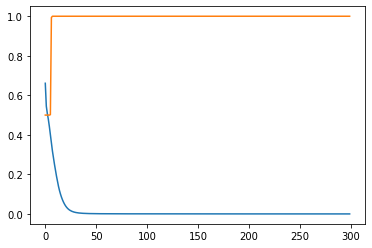

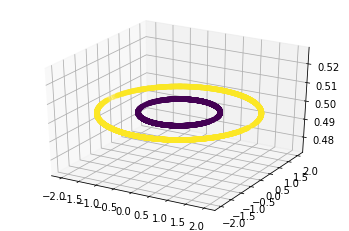

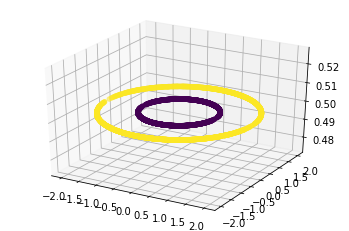

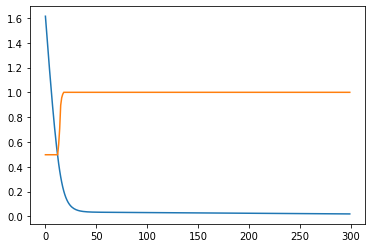

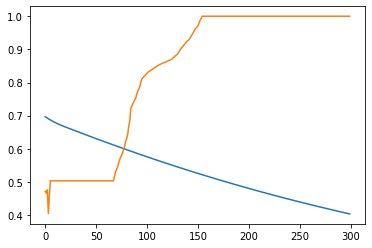

In [ ]:
#experiment(hidden_units=500,bottleneck=100,epochs=100,pt_epochs=500,outer_r=5,noise=0.5,verbose=True,exp="mid")
NN = bottleNN(500,100)
train = get_dataset("train",outer_r=5,noise=0.5,corr=1)
test = get_dataset("mid")
experiment(NN,train,test,verbose=True)

{'LLR': tensor(1.), 'before': tensor(0.4940), 'random': tensor(0.5560)}

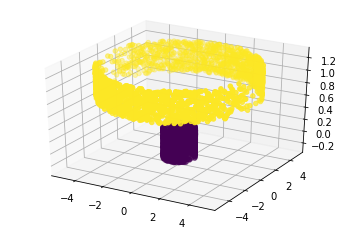

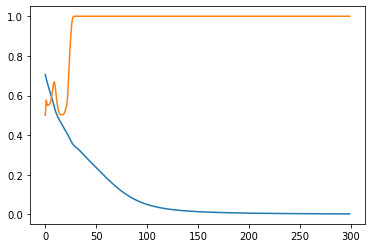

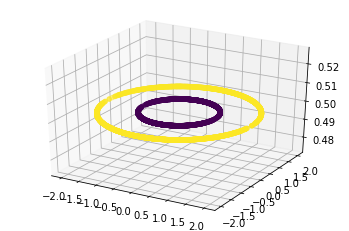

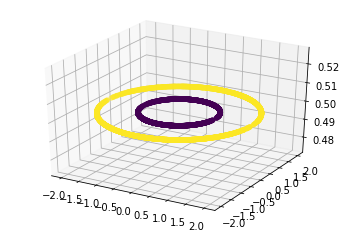

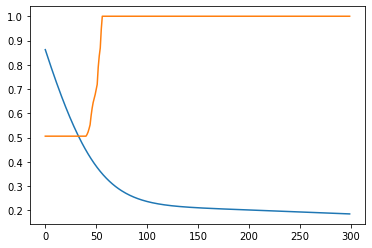

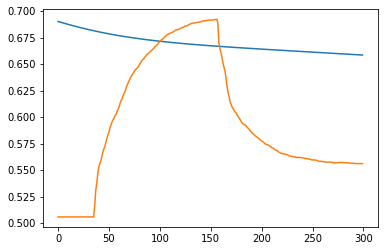

In [ ]:
NN = bottleNN(500,5)
train = get_dataset("train",outer_r=5,noise=0.5,corr=1)
test = get_dataset("mid")
experiment(NN,train,test,verbose=True)

{'LLR': tensor(0.4972), 'before': tensor(0.4972), 'random': tensor(0.5658)}

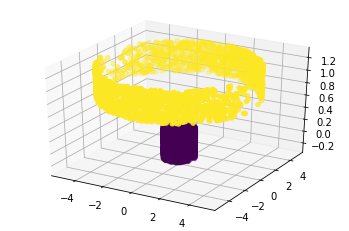

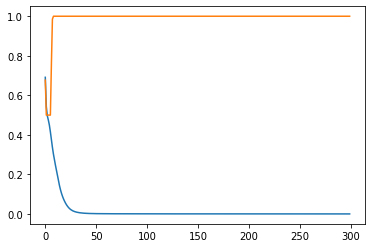

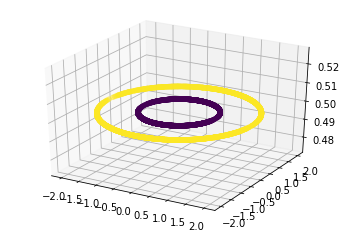

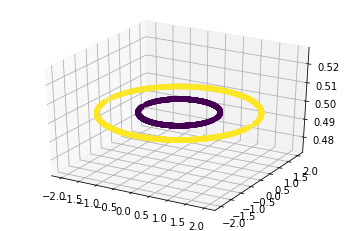

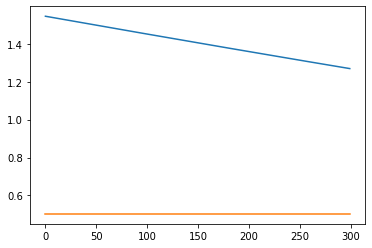

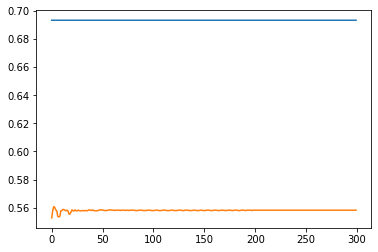

In [ ]:
#experiment(hidden_units=500,bottleneck=100,epochs=100,pt_epochs=500,outer_r=5,noise=0.5,verbose=True,exp="mid")
NN = bottleNN_bias(500,100)
train = get_dataset("train",outer_r=5,noise=0.5,corr=1)
test = get_dataset("mid")
experiment(NN,train,test,verbose=True)  

In [ ]:
#experiment(hidden_units=5000,bottleneck=100,epochs=500,pt_epochs=10,noise=0,verbose=True,exp="mid", outer_r=2, ft_test_split=0.995)
NN = bottleNN_bias(5000,100)
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("mid")
experiment(NN,train,test,test_split=0.9998,epochs=500,pt_epochs=10)  

{'LLR': tensor(1.), 'before': tensor(0.5000), 'random': tensor(0.4519)}

In [ ]:
#experiment(hidden_units=5000,bottleneck=100,epochs=500,pt_epochs=10,noise=0,verbose=True,exp="mid", outer_r=2, ft_test_split=0.995)
NN = bottleNN(5000,100)
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("mid")
experiment(NN,train,test,test_split=0.995,epochs=500,pt_epochs=10)  

{'LLR': tensor(1.), 'before': tensor(0.5003), 'random': tensor(1.)}

In [ ]:
#experiment(hidden_units=5000,bottleneck=100,epochs=500,pt_epochs=10,noise=0,verbose=True,exp="mid", outer_r=2, ft_test_split=0.995)
for _ in range(5):
  NN = bottleNN(5000,100)
  train = get_dataset("train",noise=0,corr=1)
  test = get_dataset("mid")
  print(experiment(NN,train,test,test_split=0.998,epochs=500,pt_epochs=10,verbose=False))

{'before': tensor(0.5000), 'LLR': tensor(1.), 'random': tensor(0.7425)}
{'before': tensor(0.5438), 'LLR': tensor(1.), 'random': tensor(0.7181)}
{'before': tensor(0.5004), 'LLR': tensor(1.), 'random': tensor(0.8552)}
{'before': tensor(0.4999), 'LLR': tensor(1.), 'random': tensor(0.8568)}
{'before': tensor(0.5425), 'LLR': tensor(0.9534), 'random': tensor(0.8446)}


In [ ]:
for _ in range(5):
  NN = bottleNN_bias(5000,100)
  train = get_dataset("train",noise=0,corr=1)
  test = get_dataset("mid")
  print(experiment(NN,train,test,test_split=0.998,epochs=500,pt_epochs=10,verbose=False))

{'before': tensor(0.5001), 'LLR': tensor(0.8347), 'random': tensor(0.4999)}
{'before': tensor(0.6410), 'LLR': tensor(1.), 'random': tensor(0.5075)}
{'before': tensor(0.4999), 'LLR': tensor(0.5709), 'random': tensor(0.4999)}
{'before': tensor(0.5755), 'LLR': tensor(1.), 'random': tensor(0.4997)}
{'before': tensor(0.4999), 'LLR': tensor(1.), 'random': tensor(0.4999)}


In [ ]:
#experiment(hidden_units=5000,bottleneck=100,epochs=500,pt_epochs=10,noise=0,verbose=True,exp="mid", outer_r=2, ft_test_split=0.995)
NN = bottleNN_bias(5000,100)
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("mid")
experiment(NN,train,test,test_split=0.998,epochs=500,pt_epochs=10)  

{'LLR': tensor(0.7799), 'before': tensor(0.4999), 'random': tensor(0.3542)}

In [ ]:
#experiment(hidden_units=5000,bottleneck=100,epochs=500,pt_epochs=10,noise=0,verbose=True,exp="mid", outer_r=2, ft_test_split=0.995)
NN = bottleNN_bias(5000,100)
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("mid")
experiment(NN,train,test,test_split=0.5,epochs=500,pt_epochs=10)  

{'LLR': tensor(1.), 'before': tensor(0.4983), 'random': tensor(0.5155)}

{'LLR': tensor(0.8661), 'before': tensor(0.5001), 'random': tensor(0.4999)}

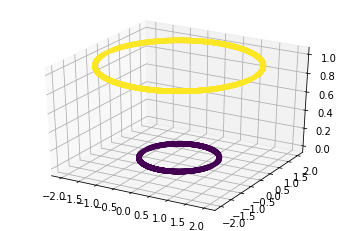

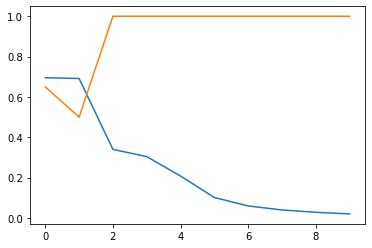

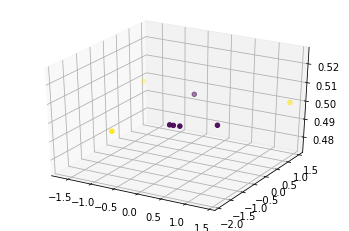

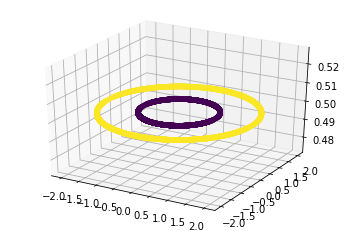

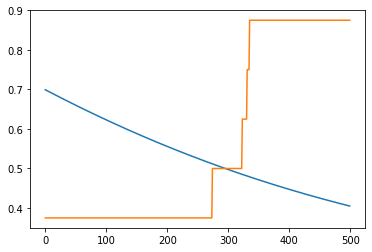

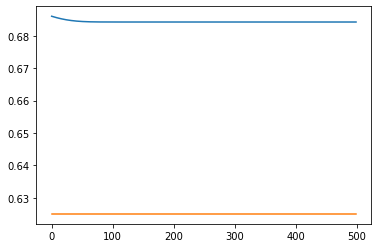

In [ ]:
NN = bottleNN_bias(5000,100)
train = get_dataset("train",noise=0)
test = get_dataset("mid")   
experiment(NN,train,test,test_split=0.999,epochs=500,pt_epochs=10,verbose=True)

In [ ]:
#experiment(hidden_units=5000,bottleneck=100,epochs=500,pt_epochs=10,noise=0,verbose=True,exp="mid", outer_r=2, ft_test_split=0.995)
NN = bottleNN_bias(500,100)
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("mid")
experiment(NN,train,test,test_split=0.995,epochs=500,pt_epochs=10)  

{'LLR': tensor(1.), 'before': tensor(0.5001), 'random': tensor(0.5662)}

In [ ]:
#experiment(hidden_units=5000,bottleneck=100,epochs=500,pt_epochs=10,noise=0,verbose=True,exp="mid", outer_r=2, ft_test_split=0.995)
NN = bottleNN(500,100)
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("mid")
experiment(NN,train,test,test_split=0.998,epochs=500,pt_epochs=10)  

{'LLR': tensor(1.), 'before': tensor(0.4996), 'random': tensor(0.9191)}

In [ ]:
#experiment(hidden_units=5000,bottleneck=100,epochs=500,pt_epochs=10,noise=0,verbose=True,exp="mid", outer_r=2, ft_test_split=0.995)
NN = bottleNN(500,100)
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("mid")
experiment(NN,train,test,test_split=0.995,epochs=500,pt_epochs=10)  

{'LLR': tensor(1.), 'before': tensor(0.4999), 'random': tensor(0.9935)}

In [ ]:
NN = bottleNN(500,100)
train = get_dataset("train",noise=0)
test = get_dataset("mid") 
default = {'model': NN, 'train_set':train,'test_set':test,'test_split':0.999,'epochs':500,'pt_epochs':10}
grid_kwarg(0.99,1,'test_split',default,model=botlpoints=2,arg_type="float")

before             LLR          random  test_split
0  tensor(0.5365)  tensor(0.5876)  tensor(0.5114)       0.990
1  tensor(0.5014)  tensor(0.5312)  tensor(0.5214)       0.995

In [ ]:
NN = bottleNN_bias(5000,100)
train = get_dataset("train",noise=0)
test = get_dataset("mid") 
default = {'model': NN, 'train_set':train,'test_set':test,'test_split':0.999,'epochs':500,'pt_epochs':10}
grid_kwarg(0.5,1,'test_split',default,points=10,arg_type="float")

before             LLR          random  test_split
0  tensor(0.5180)  tensor(0.6125)  tensor(0.4950)       0.050
1  tensor(0.5515)  tensor(0.5415)  tensor(0.5546)       0.055
2  tensor(0.5318)  tensor(0.5331)  tensor(0.4699)       0.060
3  tensor(0.3367)  tensor(0.3547)  tensor(0.3704)       0.065
4  tensor(0.5280)  tensor(0.5212)  tensor(0.5102)       0.070
5  tensor(0.4656)  tensor(0.4576)  tensor(0.4596)       0.075
6  tensor(0.4231)  tensor(0.4231)  tensor(0.4602)       0.080
7  tensor(0.4605)  tensor(0.4623)  tensor(0.4026)       0.085
8  tensor(0.3964)  tensor(0.4028)  tensor(0.4632)       0.090
9  tensor(0.4644)  tensor(0.4484)  tensor(0.5254)       0.095

In [ ]:
def average_over_exps(args,model,model_args,runs):
  agg = {}
  for _ in range(runs):
    args['model']=model(**model_args)
    result = experiment(**args)   
    if not agg:
      for k,v in result.items():
        agg[k]=[v] # start the aggreation
    else:
      for k,v in result.items():
        agg[k].append(v) # add following results
  result = {}
  for k,v in agg.items():
    result[f"{k}_mean"] = np.mean(v)
    result[f"{k}_std"] = np.std(v)
  return result


In [ ]:
model_args = {"hidden_units":5000,"bottleneck":100}
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("mid")
args = {"train_set":train,"test_set":test,"test_split":0.995,"epochs":500,"pt_epochs":10}  

average_over_exps(args,bottleNN,model_args,10)

{'LLR_mean': 1.0,
 'LLR_std': 0.0,
 'before_mean': 0.5260302,
 'before_std': 0.0784677,
 'random_mean': 0.9696859,
 'random_std': 0.06605068}

In [ ]:
model_args = {"hidden_units":5000,"bottleneck":100}
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("mid")
args = {"train_set":train,"test_set":test,"test_split":0.995,"epochs":500,"pt_epochs":10}  

average_over_exps(args,bottleNN_bias,model_args,10)

{'LLR_mean': 0.9196733,
 'LLR_std': 0.11661539,
 'before_mean': 0.55129397,
 'before_std': 0.0946388,
 'random_mean': 0.48741204,
 'random_std': 0.10092199}

In [ ]:
model_args = {"hidden_units":5000,"bottleneck":100}
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("mid")
args = {"train_set":train,"test_set":test,"test_split":0.998,"epochs":500,"pt_epochs":10}  

average_over_exps(args,bottleNN,model_args,10)

{'LLR_mean': 0.98210174,
 'LLR_std': 0.029057484,
 'before_mean': 0.57233214,
 'before_std': 0.14849818,
 'random_mean': 0.85983217,
 'random_std': 0.10777235}

In [ ]:
model_args = {"hidden_units":5000,"bottleneck":100}
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("mid")
args = {"train_set":train,"test_set":test,"test_split":0.998,"epochs":500,"pt_epochs":10}  

average_over_exps(args,bottleNN_bias,model_args,10)

{'LLR_mean': 0.85645044,
 'LLR_std': 0.15206985,
 'before_mean': 0.5139529,
 'before_std': 0.033985984,
 'random_mean': 0.44527808,
 'random_std': 0.11755376}

In [ ]:
model_args = {"hidden_units":5000,"bottleneck":100}
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("mid")
args = {"train_set":train,"test_set":test,"test_split":0.999,"epochs":500,"pt_epochs":10}  

average_over_exps(args,bottleNN,model_args,10)

{'LLR_mean': 0.8265516,
 'LLR_std': 0.15311363,
 'before_mean': 0.5311812,
 'before_std': 0.05743839,
 'random_mean': 0.6635511,
 'random_std': 0.12828794}

In [ ]:
model_args = {"hidden_units":5000,"bottleneck":100}
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("mid")
args = {"train_set":train,"test_set":test,"test_split":0.999,"epochs":500,"pt_epochs":10}  

average_over_exps(args,bottleNN_bias,model_args,10)

{'LLR_mean': 0.86820567,
 'LLR_std': 0.1372035,
 'before_mean': 0.5020145,
 'before_std': 0.006253373,
 'random_mean': 0.5252878,
 'random_std': 0.0966704}

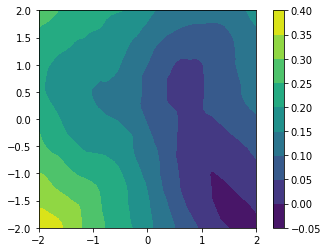

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def contour_plot(model,points=50,min_range=-2,max_range=2,z=0.5):
    x = np.linspace(min_range,max_range, num=points,endpoint=True)
    y = np.linspace(min_range,max_range, num=points,endpoint=True)
    xx, yy = np.meshgrid(x, y)
    z = z*np.ones(len(xx.flatten()))
    dataset = torch.t(torch.tensor(np.vstack([xx.flatten(),yy.flatten(),z])))
    out = model.NN(dataset.float())
    out = out.detach().numpy()
    out = out[:,0] - out[:,1]
    out = out.reshape(xx.shape)
    fig = plt.figure()
    ax = fig.add_subplot()
    s = ax.contourf(x, y, out)
    ax.axis('scaled')
    fig.colorbar(s)
    fig.show()
contour_plot(bottleNN(500,100))

{'LLR': tensor(1.), 'before': tensor(0.4999), 'random': tensor(0.7015)}

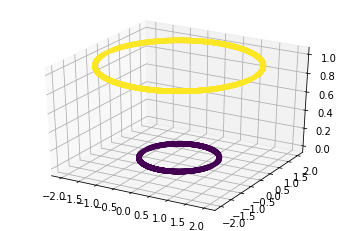

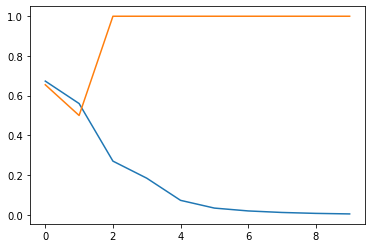

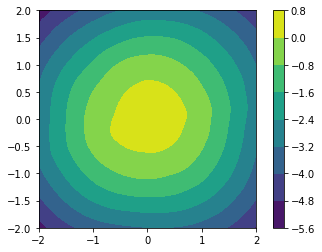

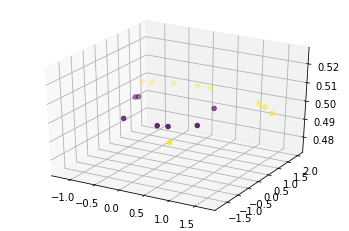

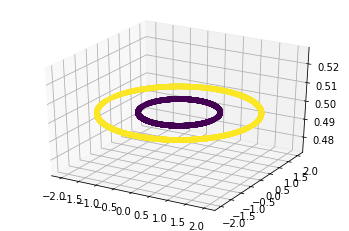

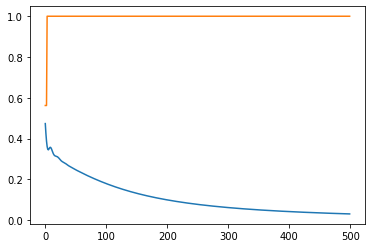

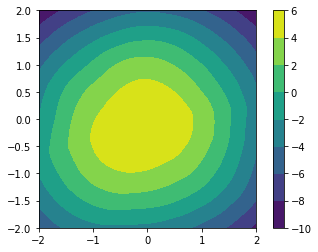

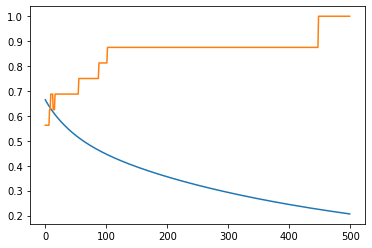

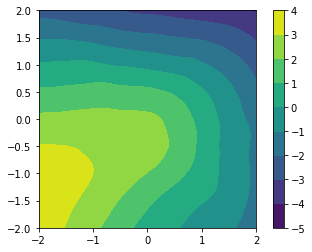

In [ ]:
model_args = {"hidden_units":5000,"bottleneck":100}
nn = bottleNN(**model_args)
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("mid")
args = {"train_set":train,"test_set":test,"test_split":0.998,"epochs":500,"pt_epochs":10}  
experiment(model =nn, verbose=True,**args)

{'LLR': tensor(0.6185), 'before': tensor(0.6260), 'random': tensor(0.4997)}

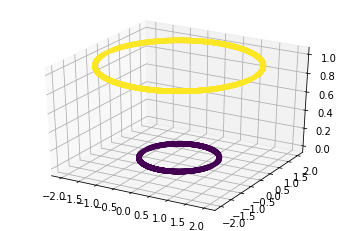

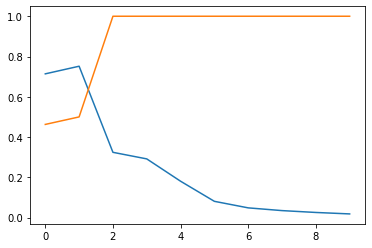

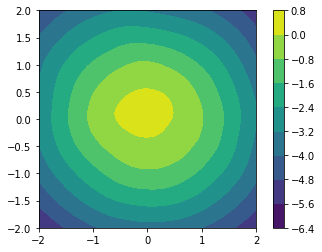

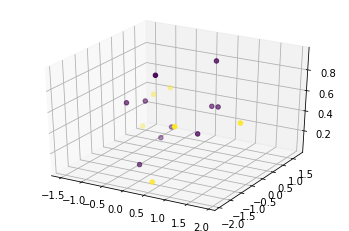

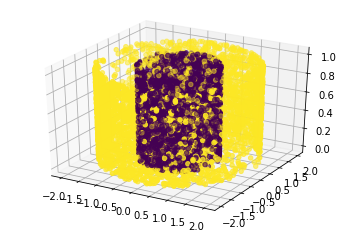

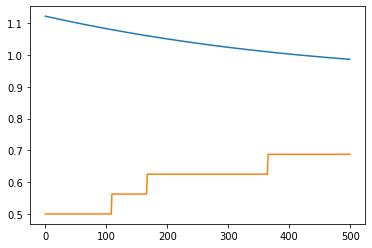

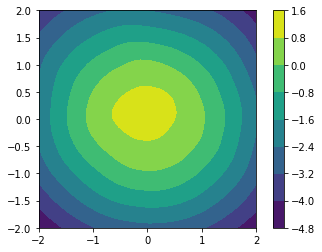

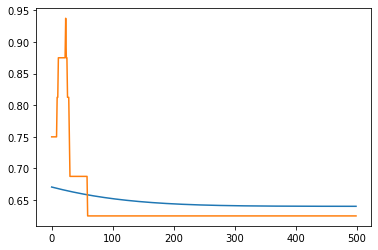

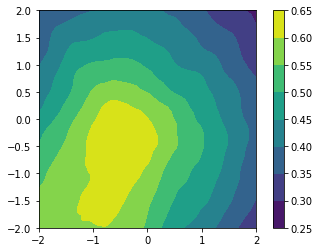

In [ ]:
model_args = {"hidden_units":5000,"bottleneck":100}
nn = bottleNN_bias(**model_args)
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("rand")
args = {"train_set":train,"test_set":test,"test_split":0.998,"epochs":500,"pt_epochs":10}  
experiment(model =nn, verbose=True,**args)

{'LLR': tensor(0.6150), 'before': tensor(0.6136), 'random': tensor(0.5439)}

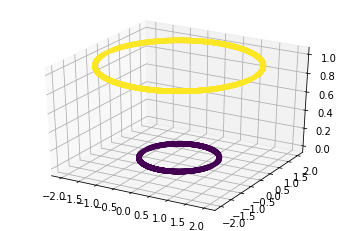

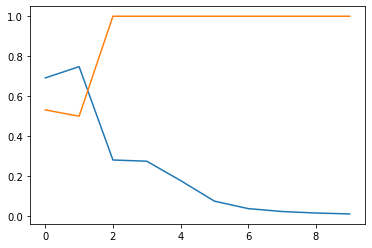

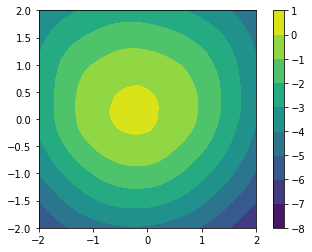

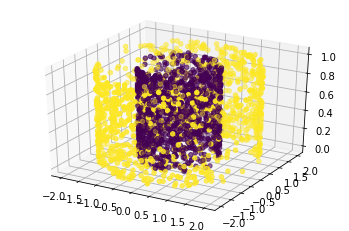

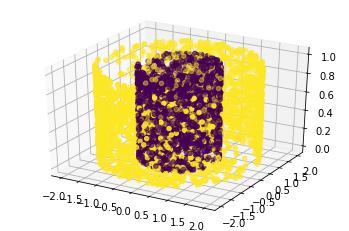

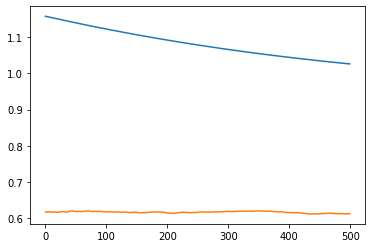

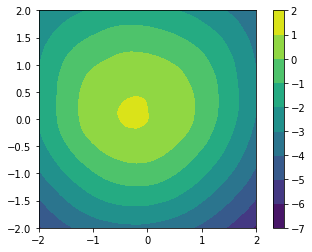

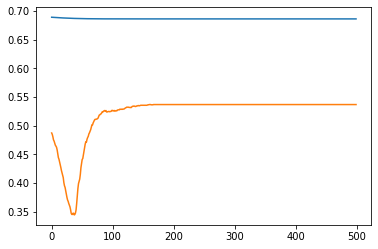

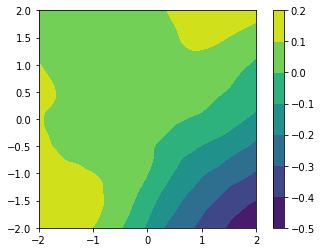

In [ ]:
model_args = {"hidden_units":5000,"bottleneck":100}
nn = bottleNN_bias(**model_args)
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("rand")
args = {"train_set":train,"test_set":test,"test_split":0.7,"epochs":500,"pt_epochs":10}  
experiment(model =nn, verbose=True,**args)

{'LLR': tensor(0.9823), 'before': tensor(0.6079), 'random': tensor(0.9989)}

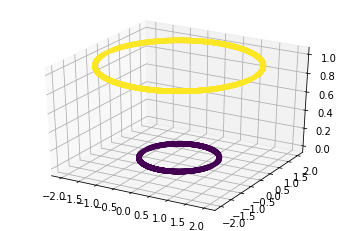

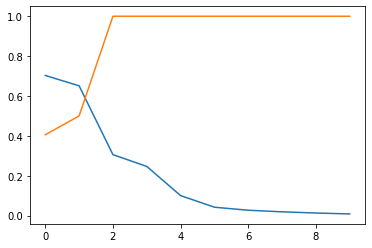

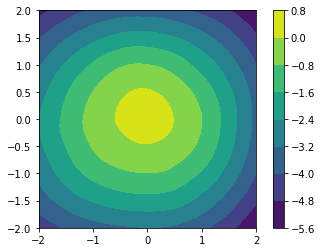

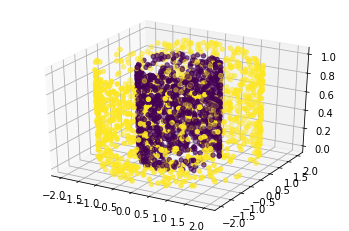

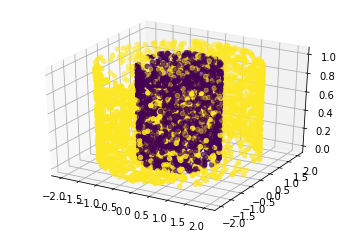

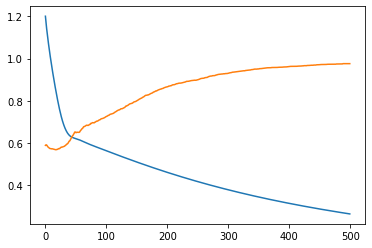

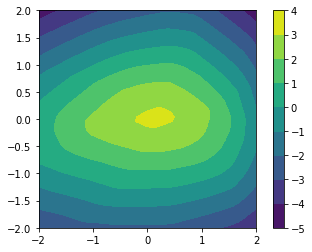

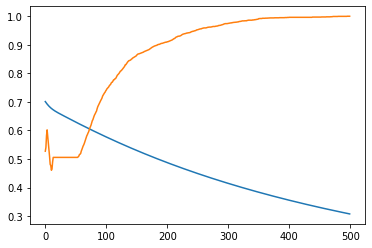

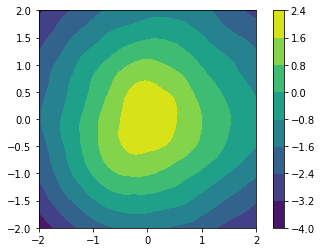

In [ ]:
model_args = {"hidden_units":5000,"bottleneck":100}
nn = bottleNN(**model_args)
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("rand")
args = {"train_set":train,"test_set":test,"test_split":0.7,"epochs":500,"pt_epochs":10}  
experiment(model =nn, verbose=True,**args)

{'LLR': tensor(0.7397), 'before': tensor(0.6062), 'random': tensor(0.9279)}

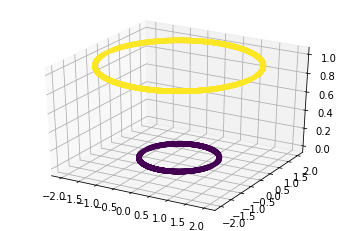

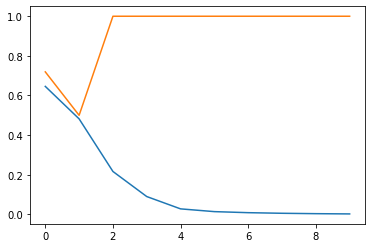

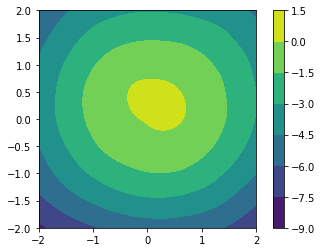

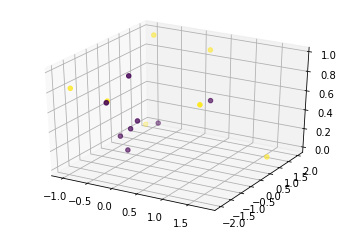

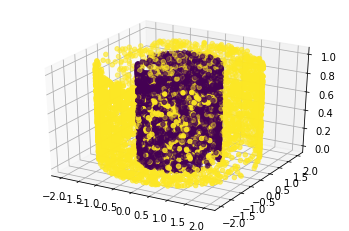

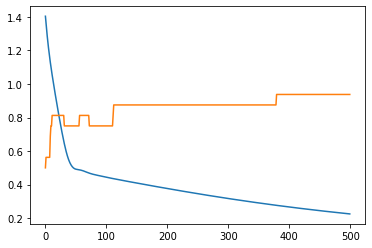

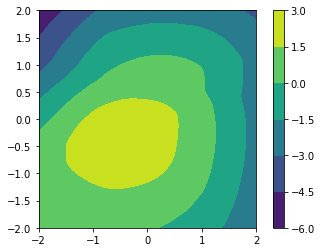

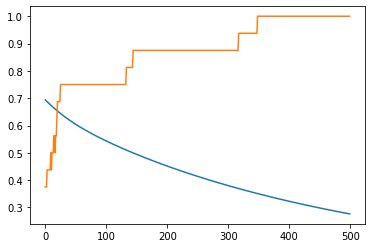

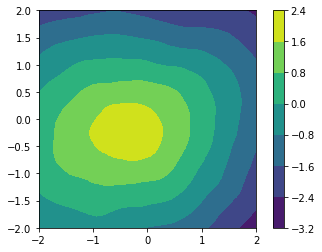

In [ ]:
model_args = {"hidden_units":5000,"bottleneck":100}
nn = bottleNN(**model_args)
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("rand")
args = {"train_set":train,"test_set":test,"test_split":0.998,"epochs":500,"pt_epochs":10}  
experiment(model =nn, verbose=True,**args)

In [ ]:
model_args = {"hidden_units":5000,"bottleneck":100}
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("rand")
args = {"train_set":train,"test_set":test,"test_split":0.998,"epochs":500,"pt_epochs":10}  
average_over_exps(args,bottleNN,model_args,10)

{'LLR_mean': 0.7482089,
 'LLR_std': 0.0825637,
 'before_mean': 0.6291332,
 'before_std': 0.014931736,
 'random_mean': 0.75113976,
 'random_std': 0.104447715}

In [ ]:
model_args = {"hidden_units":5000,"bottleneck":100}
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("rand")
args = {"train_set":train,"test_set":test,"test_split":0.999,"epochs":500,"pt_epochs":10}  
average_over_exps(args,bottleNN,model_args,10)

{'LLR_mean': 0.67414916,
 'LLR_std': 0.11125219,
 'before_mean': 0.6146146,
 'before_std': 0.014091006,
 'random_mean': 0.742555,
 'random_std': 0.10498011}

In [ ]:
model_args = {"hidden_units":5000,"bottleneck":100}
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("rand")
args = {"train_set":train,"test_set":test,"test_split":0.998,"epochs":500,"pt_epochs":10}  
average_over_exps(args,bottleNN_bias,model_args,10)

{'LLR_mean': 0.62489974,
 'LLR_std': 0.009280175,
 'before_mean': 0.62625253,
 'before_std': 0.009473124,
 'random_mean': 0.48196393,
 'random_std': 0.05585589}

In [ ]:
model_args = {"hidden_units":5000,"bottleneck":100}
train = get_dataset("train",noise=0,corr=1)
test = get_dataset("rand")
args = {"train_set":train,"test_set":test,"test_split":0.5,"epochs":500,"pt_epochs":10}  
average_over_exps(args,bottleNN,model_args,10)

{'LLR_mean': 0.96120006,
 'LLR_std': 0.014029355,
 'before_mean': 0.617425,
 'before_std': 0.015143498,
 'random_mean': 0.99965,
 'random_std': 0.0008958303}